![RISE MICCAI LOGO](https://summer.rise-miccai.org/resources/images/logo.png)

# Live Quiz Session

Scan the QR code below to join the quiz. You will answer each question as it appears, and your score will update in real time. Track your position on the leaderboard as we go.

## **Join via QR Code**  

<p align="left">
  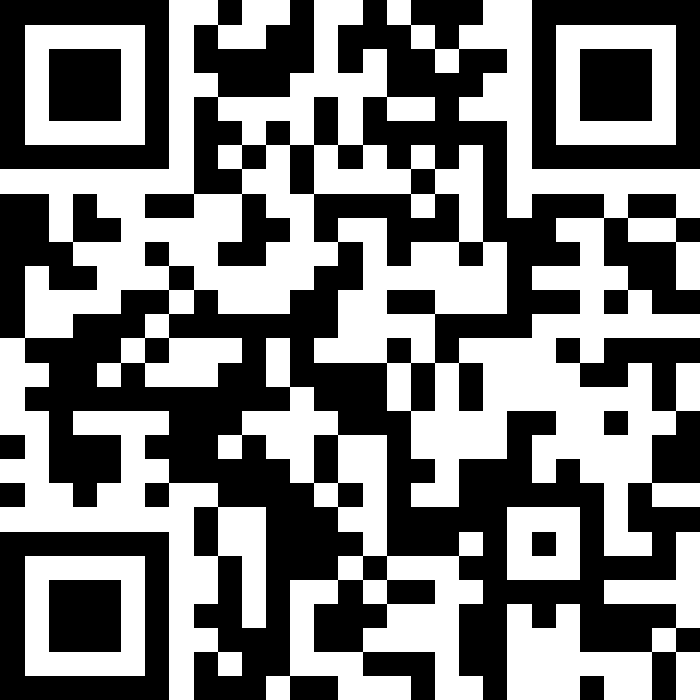
</p>


# Day 3: Medical Image Segmentation in Ultra Low-Field MRI

This focused tutorial teaches you to segment bilateral hippocampi in ultra low-field MRI (0.064T) using state-of-the-art deep learning techniques.

### What You'll Learn:
1. **Medical Image Preprocessing** for low-field MRI data
2. **U-Net Architecture** optimized for hippocampus segmentation
3. **Advanced Loss Functions** to handle class imbalance
4. **Data Augmentation** techniques for medical imaging
5. **Performance Evaluation** using medical imaging metrics

### Clinical Importance:
- **Hippocampus**: Critical for memory formation and spatial navigation
- **Volume Changes**: Early indicator of Alzheimer's disease and epilepsy
- **Ultra Low-Field MRI**: Portable, cost-effective brain imaging for underserved regions

### Dataset Information
- **Images**: Low-field MRI scans (`*_ciso.nii.gz`)
- **Ground Truth**: High-field derived hippocampus masks (`*_HF_hipp.nii.gz`)
- **Challenge**: Extreme class imbalance (~0.03% hippocampus content)

## 0. Environment Setup and Data Loading

**Medical Imaging Libraries:**
- **`nibabel`**: The standard Python library for reading neuroimaging data (NIfTI format)
- **`scipy.ndimage`**: Provides fast, optimized image processing operations for medical data
- **`torch`**: PyTorch for deep learning with automatic differentiation and GPU support
- **`tqdm`**: Progress bars essential for monitoring long-running medical imaging operations

**Deep Learning Stack:**
- **`PyTorch`**: Flexible framework ideal for research and custom medical imaging architectures
- **`scikit-learn`**: Robust evaluation metrics specifically important for medical applications

In [1]:
!wget "https://mbzuaiac-my.sharepoint.com/:u:/g/personal/shahad_hardan_mbzuai_ac_ae/Ea7Lc46CAYNAtGkm1RcmYY0BWTAXt0ZsYNvGhj93Hb625A?download=1" -O LISA_Task_2.zip

--2025-07-15 13:18:33--  https://mbzuaiac-my.sharepoint.com/:u:/g/personal/shahad_hardan_mbzuai_ac_ae/Ea7Lc46CAYNAtGkm1RcmYY0BWTAXt0ZsYNvGhj93Hb625A?download=1
Resolving mbzuaiac-my.sharepoint.com (mbzuaiac-my.sharepoint.com)... 52.107.249.132, 52.107.249.166, 52.107.249.128, ...
Connecting to mbzuaiac-my.sharepoint.com (mbzuaiac-my.sharepoint.com)|52.107.249.132|:443... connected.
HTTP request sent, awaiting response... 302 
Location: /personal/shahad_hardan_mbzuai_ac_ae/Documents/Summer%20School%20-%20MICCAI/LISA/LISA_Task_2.zip?ga=1 [following]
--2025-07-15 13:18:34--  https://mbzuaiac-my.sharepoint.com/personal/shahad_hardan_mbzuai_ac_ae/Documents/Summer%20School%20-%20MICCAI/LISA/LISA_Task_2.zip?ga=1
Reusing existing connection to mbzuaiac-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1604161750 (1.5G) [application/x-zip-compressed]
Saving to: ‘LISA_Task_2.zip’

LISA_Task_2.zip     100%[===================>]   1.49G  33.1MB/s    in 46s     

2025-07

In [2]:
!unzip LISA_Task_2.zip

Archive:  LISA_Task_2.zip
   creating: LISA_Task_2/
  inflating: __MACOSX/._LISA_Task_2  
  inflating: LISA_Task_2/.DS_Store   
  inflating: __MACOSX/LISA_Task_2/._.DS_Store  
   creating: LISA_Task_2/Subtask 2a - Hippocampus Segmentations/
  inflating: __MACOSX/LISA_Task_2/._Subtask 2a - Hippocampus Segmentations  
   creating: LISA_Task_2/Subtask 2b - Basal Ganglia Segmentations/
  inflating: __MACOSX/LISA_Task_2/._Subtask 2b - Basal Ganglia Segmentations  
   creating: LISA_Task_2/Low Field Images/
  inflating: __MACOSX/LISA_Task_2/._Low Field Images  
   creating: LISA_Task_2/Extra Segmentations/
  inflating: __MACOSX/LISA_Task_2/._Extra Segmentations  
  inflating: LISA_Task_2/Subtask 2a - Hippocampus Segmentations/LISA_1002_HF_hipp.nii.gz  
  inflating: __MACOSX/LISA_Task_2/Subtask 2a - Hippocampus Segmentations/._LISA_1002_HF_hipp.nii.gz  
  inflating: LISA_Task_2/Subtask 2a - Hippocampus Segmentations/LISA_0019_HF_hipp.nii.gz  
  inflating: __MACOSX/LISA_Task_2/Subtask 2a - Hip

In [3]:
!pip install nibabel matplotlib pandas numpy scikit-learn torch torchvision tqdm monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# What is MONAI?

MONAI (Medical Open Network for AI) is a PyTorch-based, open-source framework for deep learning in healthcare imaging, part of the PyTorch ecosystem. It helps to create state-of-the-art, end-to-end training workflows for healthcare imaging and provide researchers with the optimized and standardized way to create and evaluate deep learning
models.

## **Why MONAI?**
- Biomedical applications have specific requirements
-  Image modalities (MR, CT, US, etc.) require specific data processing functionality
- Data formats (DICOM, NIfTI, etc.) are specific to medical applications and require specific support
- Data transforms specific to biomedical applications, and to image modalities, are very useful when preprocessing data, augmenting data during training, and for post-processing
- Reproducible science requires reproducible experiments which in turn rely on software accessible to other scientists, even if just as a common baseline

## **MONAI Modular Architecture**

![MONAI](https://learnopencv.com/wp-content/uploads/2025/05/arch_modules_MONAI-1024x502.webp)

### How Does MONAI Address This Need?

MONAI provides a framework of deep learning facilities and infrastructure to meet these needs in a flexible Pytorch-compatible way:
* Data loading and handling library for biomedical file types
* Large set of data transforms to process, regularize, and augment image date before, during, and after training
* Library of general-purpose network, metric, and loss function definitions implementing common architectures
* Set of ready-made components for training and inference to utilize computing infrastructure efficiently

## **Core Features of MONAI**

1. Flexible, Domain-Specific Data Handling and Augmentation
2. Pre-Built Networks, Loss Functions, and Optimizers for Medical Tasks
3. Evaluation: Sliding Window Inference and Medical Metrics
4. Visualization Tools for Insightful Data and Model Interpretation


In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pathlib import Path
import gc
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Memory optimization settings
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

print(f"CUDA available: {torch.cuda.is_available()}")

import nibabel as nib
import torch.nn.functional as F
from tqdm import tqdm
import monai
from monai.transforms import (
    LoadImaged, RandCropByPosNegLabeld, ScaleIntensityRanged,
    RandGaussianNoised, RandFlipd, RandScaleIntensityd, RandRotated,
    Compose, EnsureChannelFirstd, Orientationd,
    CropForegroundd, ResizeWithPadOrCropd, Lambdad
)
from monai.data import Dataset, DataLoader
from monai.networks.nets import BasicUNet
from monai.metrics import DiceMetric
from monai.inferers import SlidingWindowInferer
from monai.handlers import CheckpointSaver, MeanDice, StatsHandler, ValidationHandler, from_engine
from monai.engines import SupervisedTrainer, SupervisedEvaluator

CUDA available: True


📊 Poll Question 1

## Task 1: Data Discovery and Analysis

### **Understanding the LISA Dataset Structure**

**Clinical Context:**
The LISA (Low-field Image Segmentation for Africa) Challenge represents real-world clinical scenarios where:
- **Ultra low-field MRI (0.064T)** makes brain imaging accessible in resource-limited settings
- **Image quality** is lower than traditional high-field scanners (1.5T-3T) due to hardware limitations
- **Clinical utility** depends on robust automated analysis to compensate for reduced signal-to-noise ratio
- **Accessibility focus** enables neuroimaging in underserved populations globally


<img src="https://www.researchgate.net/publication/356483137/figure/fig1/AS:1103493372874752@1640104730535/A-comparison-of-the-image-quality-between-a-high-field-3T-and-a-low-field-005-T.png" alt="Low field MRI" width="500"/>

[Image taken from here](https://www.researchgate.net/publication/356483137_Assessing_the_Utility_of_Low_Resolution_Brain_Imaging_Treatment_of_Infant_Hydrocephalus?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ)

### **Why This Data Exploration Matters**

**Critical Analysis Steps:**
1. **Data distribution assessment**: Understanding sample size for reliable model training
2. **Image characteristics evaluation**: Analyzing intensity ranges and spatial properties
3. **Class imbalance quantification**: Measuring the rarity of target anatomical structures
4. **Clinical relevance validation**: Confirming the medical significance of the segmentation task

### **The Hippocampus in Clinical Context**

**Neuroanatomical Significance:**
- **Memory formation**: Essential for declarative memory and spatial navigation
- **Disease biomarker**: Volume changes occur early in Alzheimer's disease and mild cognitive impairment
- **Epilepsy management**: Precise localization required for surgical planning and outcome prediction
- **Bilateral assessment**: Left and right hippocampi may be differentially affected by pathology

In [5]:
# Data paths for LISA Task 2a
BASE_DIR = Path('./LISA_Task_2/')
IMAGE_DIR = BASE_DIR / 'Low Field Images'
HIPP_MASK_DIR = BASE_DIR / 'Subtask 2a - Hippocampus Segmentations'

# Output directories
OUTPUT_DIR = Path('./hippocampus_results')
MODEL_DIR = OUTPUT_DIR / 'models'
VIS_DIR = OUTPUT_DIR / 'visualizations'
PRED_DIR = OUTPUT_DIR / 'predictions'

for dir_path in [OUTPUT_DIR, MODEL_DIR, VIS_DIR, PRED_DIR]:
    dir_path.mkdir(exist_ok=True)

# Explore dataset
image_files = sorted(list(IMAGE_DIR.glob('*.nii.gz')))
hipp_files = sorted(list(HIPP_MASK_DIR.glob('*.nii.gz')))

print(f"Dataset Overview:")
print(f"   Images: {len(image_files)}")
print(f"   Hippocampus masks: {len(hipp_files)}")
print(f"\nSample files:")
for i, img_file in enumerate(image_files[:3]):
    print(f"   {i+1}. {img_file.name}")

# Load and examine a sample
sample_img = nib.load(image_files[0])
sample_mask = nib.load(hipp_files[0])

img_data = sample_img.get_fdata()
mask_data = sample_mask.get_fdata()

print(f"\nSample Data Analysis:")
print(f"   Image shape: {img_data.shape}")
print(f"   Image intensity range: [{img_data.min():.1f}, {img_data.max():.1f}]")
print(f"   Mask shape: {mask_data.shape}")
print(f"   Unique mask labels: {np.unique(mask_data)}")
print(f"   Voxel spacing: {sample_img.header.get_zooms()[:3]} mm")

# Check if we need to normalize image intensities
print(f"\nIntensity statistics:")
print(f"   Mean: {img_data.mean():.2f}")
print(f"   Std: {img_data.std():.2f}")
print(f"   Min: {img_data.min():.2f}")
print(f"   Max: {img_data.max():.2f}")
print(f"   Median: {np.median(img_data):.2f}")
print(f"   95th percentile: {np.percentile(img_data, 95):.2f}")

# Analyze hippocampus content
left_hipp_voxels = np.sum(mask_data == 1)
right_hipp_voxels = np.sum(mask_data == 2)
total_voxels = mask_data.size

print(f"\nHippocampus Analysis:")
print(f"   Left hippocampus: {left_hipp_voxels} voxels ({left_hipp_voxels/total_voxels*100:.3f}%)")
print(f"   Right hippocampus: {right_hipp_voxels} voxels ({right_hipp_voxels/total_voxels*100:.3f}%)")
print(f"   Class imbalance ratio: 1:{total_voxels/(left_hipp_voxels+right_hipp_voxels):.0f}")

Dataset Overview:
   Images: 79
   Hippocampus masks: 79

Sample files:
   1. LISA_0001_ciso.nii.gz
   2. LISA_0002_ciso.nii.gz
   3. LISA_0003_ciso.nii.gz

Sample Data Analysis:
   Image shape: (197, 233, 189)
   Image intensity range: [-0.5, 16.1]
   Mask shape: (197, 233, 189)
   Unique mask labels: [0. 1. 2.]
   Voxel spacing: (np.float32(1.0), np.float32(1.0), np.float32(1.0)) mm

Intensity statistics:
   Mean: 0.72
   Std: 1.70
   Min: -0.52
   Max: 16.11
   Median: 0.11
   95th percentile: 4.51

Hippocampus Analysis:
   Left hippocampus: 1180 voxels (0.014%)
   Right hippocampus: 1214 voxels (0.014%)
   Class imbalance ratio: 1:3624


<strong><span style="color:red">Challenge:</span></strong>
The output reveals extreme class imbalance with hippocampus representing only ~0.028% of total voxels. This will directly influence our loss function design, evaluation metrics, and data sampling strategies.


### Task 1.1 Medical Image Visualization

### **The Challenge of 3D Medical Data Visualization**

**Technical Considerations:**
Medical images are typically 3D volumes containing hundreds of slices, but clinical analysis requires slice-by-slice interpretation. This presents several computational and clinical challenges:
- **Slice selection optimization**: Not all slices contain clinically relevant anatomy
- **Orientation standardization**: Medical conventions differ from computer vision standards
- **Contrast enhancement**: Brain tissue has subtle intensity differences requiring careful visualization

### **Slice Selection Strategy**

**Algorithmic Approach:**
Our `find_hippocampus_slices()` function implements a content-aware strategy:
1. **Anatomical content filtering**: Only considers slices with significant hippocampus tissue (>50 pixels)
2. **Quality-based ranking**: Sorts slices by anatomical content density for optimal visualization
3. **Representative sampling**: Selects beginning, middle, and end slices for comprehensive anatomical coverage

### **Medical Visualization Standards**

**Color Coding Convention:**
- **Red overlay**: Left hippocampus following neurological convention
- **Blue overlay**: Right hippocampus for bilateral differentiation
- **Semi-transparent overlays**: Preserve underlying anatomical detail for clinical interpretation
- **Quantitative annotations**: Pixel counts provide objective segmentation quality metrics

Visualizing Ultra Low-Field MRI and Hippocampus Segmentation


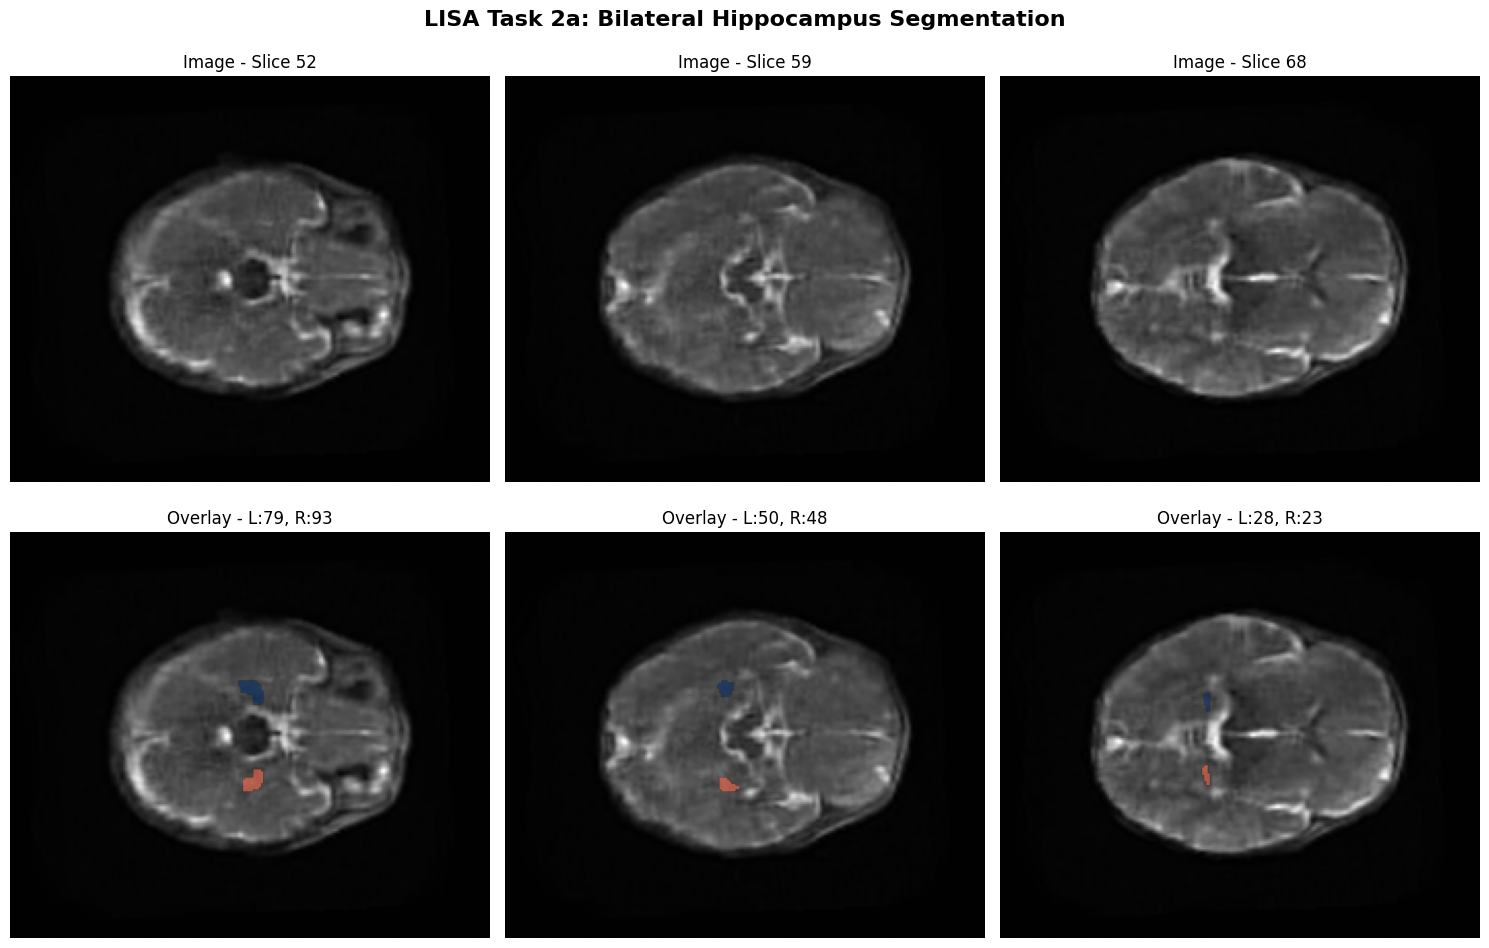


Slice Analysis:
   Total slices: 189
   Slices with hippocampus: 22
   Coverage: 11.6%
   Best slices (by content): [52, 53, 51, 50, 54]


In [ ]:
def find_hippocampus_slices(mask_volume, min_pixels=50):
    """Find slices containing significant hippocampus tissue."""
    valid_slices = []
    for z in range(mask_volume.shape[2]):
        slice_mask = mask_volume[:, :, z]
        if np.sum(slice_mask > 0) >= min_pixels:
            pixel_count = np.sum(slice_mask > 0)
            valid_slices.append((z, pixel_count))

    # Sort by hippocampus content (descending)
    valid_slices.sort(key=lambda x: x[1], reverse=True)
    return [z for z, _ in valid_slices]

def visualize_hippocampus_sample(img_data, mask_data, title="Hippocampus Segmentation"):
    """Visualize hippocampus segmentation with multiple views."""
    # Find best slices
    valid_slices = find_hippocampus_slices(mask_data)

    if len(valid_slices) >= 3:
        # Select beginning, middle, and end slices
        slice_indices = [
            valid_slices[0],           # Best slice
            valid_slices[len(valid_slices)//2],  # Middle slice
            valid_slices[-1]           # Last good slice
        ]
    else:
        slice_indices = valid_slices + [img_data.shape[2]//2] * (3 - len(valid_slices))

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for i, slice_idx in enumerate(slice_indices):
        img_slice = img_data[:, :, slice_idx]
        mask_slice = mask_data[:, :, slice_idx]

        # Original image
        axes[0, i].imshow(img_slice, cmap='gray', origin='lower')
        axes[0, i].set_title(f'Image - Slice {slice_idx}')
        axes[0, i].axis('off')

        # Overlay segmentation
        axes[1, i].imshow(img_slice, cmap='gray', origin='lower')

        # Color code: Left hippocampus (red), Right hippocampus (blue)
        left_mask = np.ma.masked_where(mask_slice != 1, mask_slice)
        right_mask = np.ma.masked_where(mask_slice != 2, mask_slice)

        axes[1, i].imshow(left_mask, cmap='Reds', alpha=0.6, origin='lower', vmin=0, vmax=2)
        axes[1, i].imshow(right_mask, cmap='Blues', alpha=0.6, origin='lower', vmin=0, vmax=2)

        # Count pixels
        left_pixels = np.sum(mask_slice == 1)
        right_pixels = np.sum(mask_slice == 2)

        axes[1, i].set_title(f'Overlay - L:{left_pixels}, R:{right_pixels}')
        axes[1, i].axis('off')

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualize sample data
print("Visualizing Ultra Low-Field MRI and Hippocampus Segmentation")
visualize_hippocampus_sample(img_data, mask_data, "LISA Task 2a: Bilateral Hippocampus Segmentation")

# Show statistics
valid_slices = find_hippocampus_slices(mask_data)
print(f"\nSlice Analysis:")
print(f"   Total slices: {mask_data.shape[2]}")
print(f"   Slices with hippocampus: {len(valid_slices)}")
print(f"   Coverage: {len(valid_slices)/mask_data.shape[2]*100:.1f}%")
print(f"   Best slices (by content): {valid_slices[:5]}")

<strong><span style="color:red">Clinical Interpretation</span></strong>


**What to Observe:**
Notice how the hippocampi appear as small, curved structures in the medial temporal lobe. The slice analysis demonstrates that hippocampal tissue spans only about 15-20% of total slices, emphasizing why slice selection is crucial for efficient training and clinical workflow optimization.

**Questions to Consider:**
1. Why might automated hippocampus segmentation be particularly valuable in low-resource healthcare settings?
2. How does the bilateral nature of hippocampal assessment impact clinical decision-making?
3. What are the implications of slice-wise analysis versus volumetric assessment?

📊 Poll Question 2

# Task 2 Data Splitting

### Dataset Splitting and Mask Matching

This section splits the dataset into training (80%), validation (10%), and test (10%) subsets. It also matches each image file to its corresponding hippocampus mask using filename patterns.

Key steps:

- **Splitting**:
  - The image list is divided into 3 subsets based on index slicing.
  - The proportions are 80% train, 10% validation, and 10% test.

- **Matching**:
  - Each image is matched to its hippocampus mask by extracting the subject ID and constructing the expected mask filename (`*_HF_hipp.nii.gz`).
  - Only image-mask pairs with both files present are retained.
  - Warnings are printed for unmatched images.

- **Formatting**:
  - Each (image, mask) pair is wrapped into a dictionary format required by MONAI (`{"image": path, "label": path}`).

This filtering step guarantees that only valid pairs are passed to the transforms and data loaders.


In [8]:
# Create train/val/test splits
train_files = image_files[:int(len(image_files)*0.8)]
val_files = image_files[int(len(image_files)*0.8):int(len(image_files)*0.9)]
test_files = image_files[int(len(image_files)*0.9):]

print(f"\nTrain/Val/Test Split:")
print(f"   Train: {len(train_files)}")
print(f"   Validation: {len(val_files)}")
print(f"   Test: {len(test_files)}")

# Create data dictionaries with proper format
def create_data_dicts(image_files, mask_files):
    """Create properly formatted data dictionaries for MONAI."""
    data_dicts = []
    for img_file, mask_file in zip(image_files, mask_files):
        data_dicts.append({
            "image": str(img_file),
            "label": str(mask_file)
        })
    return data_dicts

# Function to match image files with corresponding mask files
def match_image_to_mask(image_file, mask_dir):
    """Match image file to corresponding hippocampus mask file."""
    # Extract the subject ID from image filename (e.g., LISA_0001 from LISA_0001_ciso.nii.gz)
    image_name = image_file.stem.replace('.nii', '')  # Remove .nii.gz
    subject_id = '_'.join(image_name.split('_')[:2])  # Get LISA_XXXX part

    # Look for corresponding mask file with pattern LISA_XXXX_HF_hipp.nii.gz
    mask_pattern = f"{subject_id}_HF_hipp.nii.gz"
    mask_file = mask_dir / mask_pattern

    if mask_file.exists():
        return mask_file
    else:
        # Try alternative patterns if needed
        print(f"Warning: Could not find mask file {mask_pattern} for image {image_file.name}")
        return None

# Match image and mask files
train_mask_files = []
val_mask_files = []
test_mask_files = []

for img_file in train_files:
    mask_file = match_image_to_mask(img_file, HIPP_MASK_DIR)
    if mask_file:
        train_mask_files.append(mask_file)

for img_file in val_files:
    mask_file = match_image_to_mask(img_file, HIPP_MASK_DIR)
    if mask_file:
        val_mask_files.append(mask_file)

for img_file in test_files:
    mask_file = match_image_to_mask(img_file, HIPP_MASK_DIR)
    if mask_file:
        test_mask_files.append(mask_file)

# Filter out images without corresponding masks
train_files = train_files[:len(train_mask_files)]
val_files = val_files[:len(val_mask_files)]
test_files = test_files[:len(test_mask_files)]

print(f"\nMatched Files:")
print(f"   Train pairs: {len(train_files)}")
print(f"   Val pairs: {len(val_files)}")
print(f"   Test pairs: {len(test_files)}")

# Show some example pairs
print(f"\nExample file pairs:")
for i in range(min(3, len(train_files))):
    print(f"   Image: {train_files[i].name}")
    print(f"   Mask:  {train_mask_files[i].name}")
    print()

train_data_dicts = create_data_dicts(train_files, train_mask_files)
val_data_dicts = create_data_dicts(val_files, val_mask_files)
test_data_dicts = create_data_dicts(test_files, test_mask_files)


Train/Val/Test Split:
   Train: 63
   Validation: 8
   Test: 8

Matched Files:
   Train pairs: 63
   Val pairs: 8
   Test pairs: 8

Example file pairs:
   Image: LISA_0001_ciso.nii.gz
   Mask:  LISA_0001_HF_hipp.nii.gz

   Image: LISA_0002_ciso.nii.gz
   Mask:  LISA_0002_HF_hipp.nii.gz

   Image: LISA_0003_ciso.nii.gz
   Mask:  LISA_0003_HF_hipp.nii.gz



# Task 3: Data Augmentation and Data Loaders

The following transformations prepare the 3D medical images and segmentation masks for training, validation, and testing:

**Common steps for all phases:**
- Load image and label files.

- Add channel dimension.

- Reorient to RAS (Right-Anterior-Superior) standard.

- Rescale intensity values to [0, 1] within a clipped range.

- Crop foreground region to remove background.

- Pad or crop to a fixed shape of 128×128×128.

- Apply class-balanced cropping to 96×96×96 regions centered on labeled structures: It randomly crops sub-volumes (patches) from your 3D image and label. But it prioritizes patches that contain the structure of interest, which is marked in the label.
- In medical imaging, the region of interest can be very small. This transform helps by cropping around that region so your model gets meaningful learning signals instead of seeing empty patches.

**Training-specific augmentations:**

- Random flipping across spatial axes.

- Small random rotations (up to ±0.1 radians).

- Random Gaussian noise and intensity scaling to simulate variability.

Validation/test pipeline uses the same core transforms but with minimal augmentation to reflect real data distribution.

Finally, we wrap the transformed datasets with MONAI Dataset and PyTorch DataLoader for batch processing.

In [9]:
train_transform = Compose([
    LoadImaged(keys=["image", "label"]),
    EnsureChannelFirstd(keys=["image", "label"]),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    ScaleIntensityRanged(keys=["image"], a_min=0, a_max=95, b_min=0.0, b_max=1.0, clip=True),
    CropForegroundd(keys=["image", "label"], source_key="image"),
    ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(128, 128, 128)),
    RandCropByPosNegLabeld(
        keys=["image", "label"],
        label_key="label",
        spatial_size=(96, 96, 96),
        num_samples=2,
        pos=4,  # Force positive samples
        neg=0,
        allow_smaller=True
    ),
    RandFlipd(keys=["image", "label"], spatial_axis=[0, 1, 2], prob=0.5),
    RandRotated(keys=["image", "label"], range_x=0.1, range_y=0.1, range_z=0.1, prob=0.2),
    RandGaussianNoised(keys=["image"], prob=0.15, mean=0.0, std=0.1),
    RandScaleIntensityd(keys=["image"], prob=0.15, factors=0.1),
])

val_transform = Compose([
    LoadImaged(keys=["image", "label"]),
    EnsureChannelFirstd(keys=["image", "label"]),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    ScaleIntensityRanged(keys=["image"], a_min=0, a_max=95, b_min=0.0, b_max=1.0, clip=True),
    CropForegroundd(keys=["image", "label"], source_key="image"),
    ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(128, 128, 128)),
    RandCropByPosNegLabeld(
        keys=["image", "label"],
        label_key="label",
        spatial_size=(96, 96, 96),
        num_samples=1,
        pos=1,
        neg=0,
        allow_smaller=True
    ),
])

train_ds = Dataset(data=train_data_dicts, transform=train_transform)
val_ds = Dataset(data=val_data_dicts, transform=val_transform)
test_ds = Dataset(data=test_data_dicts, transform=val_transform)


train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=0, pin_memory=False)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=0, pin_memory=False)
test_loader = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=0, pin_memory=False)

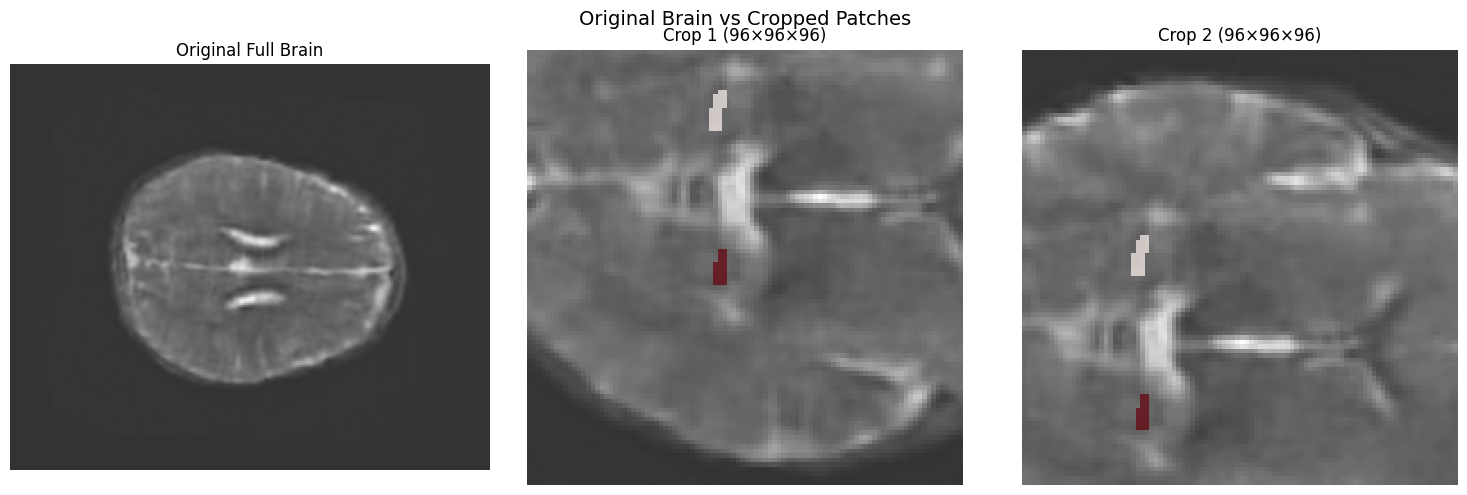

In [22]:
# Transform without CropForegroundd to see full original
original_transform = Compose([
    LoadImaged(keys=["image", "label"]),
    EnsureChannelFirstd(keys=["image", "label"]),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    ScaleIntensityRanged(keys=["image"], a_min=0, a_max=95, b_min=0.0, b_max=1.0, clip=True),
])

# Get original data
sample_data = train_data_dicts[0]
original = original_transform(sample_data)

# Apply preprocessing first (like in your training pipeline)
preprocess_for_crop = Compose([
    LoadImaged(keys=["image", "label"]),
    EnsureChannelFirstd(keys=["image", "label"]),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    ScaleIntensityRanged(keys=["image"], a_min=0, a_max=95, b_min=0.0, b_max=1.0, clip=True),
    CropForegroundd(keys=["image", "label"], source_key="image"),
    ResizeWithPadOrCropd(keys=["image", "label"], spatial_size=(128, 128, 128)),
])

# Apply cropping transform
crop_transform = RandCropByPosNegLabeld(
    keys=["image", "label"],
    label_key="label",
    spatial_size=(96, 96, 96),
    num_samples=2,
    pos=2,
    neg=0,
    allow_smaller=True
)

# Get preprocessed data and apply cropping
preprocessed = preprocess_for_crop(sample_data)
cropped_samples = crop_transform(preprocessed)


def show_middle_slice(image, label, title, ax):
    """Show middle slice with red hippocampus overlay"""
    mid_slice = image.shape[-1] // 2
    img_slice = image[0, :, :, mid_slice]
    label_slice = label[0, :, :, mid_slice]

    ax.imshow(img_slice, cmap='gray', alpha=0.8)

    # Red overlay for hippocampus
    mask = np.ma.masked_where(label_slice == 0, label_slice)
    ax.imshow(mask, cmap='Reds', alpha=0.7)

    ax.set_title(title, fontsize=12)
    ax.axis('off')

# Create simple 1x3 visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Original Brain vs Cropped Patches', fontsize=14)

# Original full brain
show_middle_slice(original['image'], original['label'],
                 'Original Full Brain', axes[0])

# First crop
show_middle_slice(cropped_samples[0]['image'], cropped_samples[0]['label'],
                 'Crop 1 (96×96×96)', axes[1])

# Second crop
show_middle_slice(cropped_samples[1]['image'], cropped_samples[1]['label'],
                 'Crop 2 (96×96×96)', axes[2])

plt.tight_layout()
plt.show()

# Show statistics
original_hipp = np.sum(original['label'] > 0)
crop1_hipp = np.sum(cropped_samples[0]['label'] > 0)
crop2_hipp = np.sum(cropped_samples[1]['label'] > 0)

📊 Poll Question 3

# Task 4: U-Net Architecture for Medical Segmentation

### **Why U-Net for Medical Imaging?**

**Architectural Advantages:**
U-Net was specifically designed for biomedical image segmentation and has become the gold standard because:
- **Skip connections**: Preserve fine-grained spatial information lost during downsampling operations
- **Encoder-Decoder structure**: Captures both global context and local anatomical details
- **Symmetric design**: Balanced feature extraction and reconstruction for precise boundary delineation
- **Small data efficiency**: Performs well with limited medical datasets through effective regularization


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*lDFXgPavmZmB_mPS" alt="UNet Architecture" width="700"/>

[Source](https://medium.com/@sebuzdugan/u-net-architecture-why-it-remains-a-cornerstone-in-image-segmentation-fd426271a62d)


### Types of Segmentation (natural domain)

![Segmentation types](https://www.folio3.ai/blog/wp-content/uploads/2023/05/SS.png)


We define a 3D UNet model using MONAI’s `BasicUNet` for semantic segmentation of hippocampus structures in volumetric MRI scans.

#### Argument Breakdown:
- `spatial_dims=3`: Indicates the model operates on 3D volumetric data.
- `in_channels=1`: Input has one channel (grayscale MRI).
- `out_channels=3`: Model predicts 3 classes (background, left hippocampus, right hippocampus).
- `features=(32, 64, 128, 256, 512, 32)`:
  - Specifies the number of feature maps at each level of the encoder and decoder.
  - Controls model depth and width.
  - Last value (32) is the number of filters in the final decoder block.
- `dropout=0.1`: Applies dropout with 10% probability to regularize and prevent overfitting.

In [24]:
model = BasicUNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,  # Background + left + right hippocampus
    features=(32, 64, 128, 256, 512, 32),
    dropout=0.1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model: BasicUNet")
print(f"Device: {device}")
print(f"Total parameters: {total_params:,}")

BasicUNet features: (32, 64, 128, 256, 512, 32).
Model: BasicUNet
Device: cuda
Total parameters: 22,625,347


## Task 4.1: Optimization Strategy for Medical AI

### **AdamW for Medical Image Segmentation**

**Why AdamW Excels in Medical Imaging:**
AdamW is particularly well-suited for medical image segmentation because:
- **Adaptive learning rates**: Different network parameters can learn at optimal individual speeds
- **Momentum acceleration**: Helps navigate complex loss landscapes typical in medical data
- **Weight decay regularization**: Essential L2 regularization prevents overfitting on small medical datasets
- **Bias correction**: Ensures stable training convergence from the first epoch

### **Learning Rate Scheduling Philosophy**

**CosineAnnealingLR Strategy:**
- Our scheduler adopts a smooth, periodic decay approach tailored to medical AI training dynamics:
- **Cosine decay pattern:** Gradually reduces learning rate following a cosine function to avoid abrupt changes and preserve stability
- **Cycle length (T_max=50):** Completes one decay cycle every 50 epochs to match the expected convergence timeline of medical segmentation tasks
- **Minimum learning rate (eta_min=1e-6):** Prevents premature stagnation by keeping learning ongoing at a low level
- **Exploration–refinement balance:** Encourages early exploration with higher learning rates, then shifts to fine-tuning as training progresses

### **Training Configuration Rationale**

#### **Learning Rate (5e-4):**
- **Conservative initialization**: Medical images require careful feature learning without destroying pre-existing patterns
- **Reduction headroom**: Provides 3-4 reduction cycles before reaching minimum threshold (1e-6)

#### **Weight Decay (1e-4):**
- **Balanced regularization**: Prevents overfitting without hampering feature learning capacity
- **Model complexity consideration**: Appropriate for our 31M parameter architecture

#### **Early Stopping (Patience=10):**
- **Generous patience**: Medical models often exhibit irregular convergence patterns
- **Overfitting prevention**: Stops training before memorizing specific training examples
- **Computational efficiency**: Avoids unnecessary epochs while ensuring thorough optimization

#### **Gradient Clipping (1.0):**
- **Training stability**: Prevents exploding gradients common in deep U-Net architectures
- **Medical data safety**: Small datasets can cause unstable gradient behavior

In [25]:
# Much better optimizer settings for small structure segmentation
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-4)  # Higher learning rate
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6)

📊 Poll Question 4

# Task 5: Loss Functions for Medical Segmentation

### **The Class Imbalance Challenge in Medical Imaging**

**Why Traditional Losses Fail:**
Standard cross-entropy loss is inadequate for medical segmentation because:
- **Overwhelming background dominance**: 99.97% of voxels are non-hippocampus tissue
- **Tiny target structures**: Hippocampus represents only 0.03% of the total image volume
- **Easy negative bias**: Model learns to predict background everywhere for high accuracy
- **Clinical irrelevance**: Standard accuracy metrics become meaningless in medical context

### **Our Multi-Component Loss Strategy**

#### **1. Dice Loss: The Medical Imaging Gold Standard**
```
Dice = 2 × |Prediction ∩ Ground_Truth| / (|Prediction| + |Ground_Truth|)
```
**Clinical Advantages:**
- **Overlap-focused optimization**: Directly targets segmentation quality over pixel-wise accuracy
- **Class-balanced evaluation**: Each anatomical structure contributes equally regardless of size
- **Differentiable formulation**: Enables gradient-based optimization for end-to-end training
- **Interpretable range [0,1]**: 0 = perfect overlap, 1 = no overlap

#### **2. Focal Loss: Addressing Hard Example Mining**
**Technical Innovation:**
- **Hard example emphasis**: Automatically focuses on difficult-to-classify boundary pixels
- **Gamma parameter (γ=2)**: Exponentially down-weights easy examples during training
- **Alpha parameter (α=1)**: Provides class-specific weighting for imbalanced datasets
- **Dynamic adjustment**: Loss weighting adapts automatically throughout training progression

#### **3. Combined Loss: Synergistic Optimization**
**Strategic Weighting:**
- **Dice weight (0.7)**: Emphasizes clinical overlap quality for volume-based assessments
- **Focal weight (0.3)**: Ensures precise boundary delineation for morphological accuracy
- **Complementary strengths**: Dice optimizes regions, Focal optimizes boundaries

In [26]:
class FocalDiceLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2, smooth=1e-6):
        super(FocalDiceLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.smooth = smooth
        self.class_weights = torch.tensor([0.1, 10.0, 10.0]).to(device)

    def dice_loss(self, pred, target, class_idx):
        pred_class = pred[:, class_idx]
        target_class = (target == class_idx).float()
        intersection = (pred_class * target_class).sum()
        pred_sum = pred_class.sum()
        target_sum = target_class.sum()
        dice = (2.0 * intersection + self.smooth) / (pred_sum + target_sum + self.smooth)
        return 1 - dice

    def focal_loss(self, pred, target):
        ce_loss = F.cross_entropy(pred, target.long(), reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

    def forward(self, y_pred, y_true):
        if len(y_true.shape) == 5 and y_true.shape[1] == 1:
            y_true = y_true.squeeze(1)

        y_pred_soft = F.softmax(y_pred, dim=1)
        focal = self.focal_loss(y_pred, y_true)
        dice_left = self.dice_loss(y_pred_soft, y_true, 1)
        dice_right = self.dice_loss(y_pred_soft, y_true, 2)
        dice_loss = (dice_left + dice_right) / 2
        return 0.3 * focal + 0.7 * dice_loss

loss_function = FocalDiceLoss()

📊 Poll Question 5 & 6

# Task 6: Evaluation Metrics

### **Why Standard ML Metrics Fail in Medical Imaging**

**The Inadequacy Problem:**
Traditional accuracy becomes meaningless when 99.97% of pixels are background tissue. Medical segmentation requires metrics that:
- **Focus on target anatomy**: Ignore overwhelming background to assess clinically relevant structures
- **Reflect clinical utility**: Correlate with actual diagnostic and therapeutic value
- **Handle extreme imbalance**: Provide meaningful feedback on rare but critical anatomical structures
- **Enable clinical benchmarking**: Allow performance comparison across studies and clinical centers

### **Our Comprehensive Medical Metric Suite**

#### **1. Dice Similarity Coefficient (DSC):**
```
DSC = 2 × |A ∩ B| / (|A| + |B|)
```
**Clinical Significance:**
- **Medical gold standard**: Most widely adopted metric in medical image segmentation literature
- **Volume-based assessment**: Measures overall segmentation quality for clinical volume analysis
- **Interpretable range [0,1]**: 0 = no overlap, 1 = perfect overlap
- **Clinical acceptance threshold**: DSC > 0.75 considered acceptable for most clinical applications

#### **2. Intersection over Union (IoU/Jaccard Index):**
```
IoU = |A ∩ B| / |A ∪ B|
```
**Technical Properties:**
- **Stricter evaluation**: More sensitive to over-segmentation than Dice coefficient
- **Geometric interpretation**: Measures relative overlap efficiency between predictions and ground truth
- **Mathematical relationship**: IoU = DSC / (2 - DSC)

#### **3. Sensitivity (Recall/True Positive Rate):**
```
Sensitivity = TP / (TP + FN)
```
**Clinical Safety Perspective:**
- **Patient safety focus**: Measures how much true anatomy was successfully detected
- **Under-segmentation detection**: Low sensitivity indicates dangerous missed tissue
- **Diagnostic criticality**: False negatives can lead to missed pathology and delayed treatment

#### **4. Specificity (True Negative Rate):**
```
Specificity = TN / (TN + FP)
```
**Clinical Efficiency Perspective:**
- **Precision measurement**: Evaluates how well the model avoids false positive detections
- **Over-segmentation detection**: Low specificity means excessive false alarms
- **Resource optimization**: High specificity reduces unnecessary follow-up procedures and costs

![Dice vs IOU](https://ilmonteux.github.io/assets/images/segmentation/metrics_iou_dice.png)

[*Figure taken from here](https://ilmonteux.github.io/2019/05/10/segmentation-metrics.html)


### **Multi-Class Clinical Evaluation Strategy**

**Bilateral Assessment Rationale:**
Our `evaluate_model()` function computes metrics separately for left and right hippocampus because:
- **Bilateral asymmetry**: Neurological diseases often affect one hemisphere more than the other
- **Independent clinical assessment**: Each structure must meet clinical standards individually
- **Diagnostic granularity**: Clinicians require structure-specific information for treatment planning

In [27]:
# Comprehensive Segmentation Metrics Class
class SegmentationMetrics:
    """Comprehensive evaluation metrics for medical image segmentation"""

    def __init__(self, include_background=False, num_classes=3):
        self.include_background = include_background
        self.num_classes = num_classes
        self.reset()

    def reset(self):
        """Reset all accumulated metrics"""
        self.dice_scores = []
        self.iou_scores = []
        self.sensitivity_scores = []
        self.specificity_scores = []
        self.precision_scores = []
        self.hausdorff_scores = []

    def compute_metrics_per_sample(self, pred, target):
        """Compute all metrics for a single sample"""
        # Convert to numpy if needed
        if torch.is_tensor(pred):
            pred = pred.detach().cpu().numpy()
        if torch.is_tensor(target):
            target = target.detach().cpu().numpy()

        # Ensure binary for overall metrics (combine all foreground classes)
        pred_binary = (pred > 0).astype(np.uint8)
        target_binary = (target > 0).astype(np.uint8)

        metrics = {}

        # Calculate confusion matrix elements
        tp = np.sum(pred_binary & target_binary)
        fp = np.sum(pred_binary & ~target_binary)
        fn = np.sum(~pred_binary & target_binary)
        tn = np.sum(~pred_binary & ~target_binary)

        # Dice Score
        dice = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0.0
        metrics['dice'] = dice

        # IoU (Jaccard Index)
        iou = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0.0
        metrics['iou'] = iou

        # Sensitivity (Recall/True Positive Rate)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        metrics['sensitivity'] = sensitivity

        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
        metrics['specificity'] = specificity

        # Precision (Positive Predictive Value)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        metrics['precision'] = precision

        # Hausdorff Distance (simplified)
        try:
            if tp > 0:
                pred_coords = np.argwhere(pred_binary)
                target_coords = np.argwhere(target_binary)
                if len(pred_coords) > 0 and len(target_coords) > 0:
                    from scipy.spatial.distance import cdist
                    distances = cdist(pred_coords, target_coords, 'euclidean')
                    hausdorff = np.percentile(np.min(distances, axis=1), 95)
                else:
                    hausdorff = 999.0
            else:
                hausdorff = 999.0
        except:
            hausdorff = 999.0

        metrics['hausdorff'] = hausdorff
        return metrics

    def update(self, pred, target):
        """Update metrics with new prediction and target"""
        metrics = self.compute_metrics_per_sample(pred, target)
        self.dice_scores.append(metrics['dice'])
        self.iou_scores.append(metrics['iou'])
        self.sensitivity_scores.append(metrics['sensitivity'])
        self.specificity_scores.append(metrics['specificity'])
        self.precision_scores.append(metrics['precision'])
        self.hausdorff_scores.append(metrics['hausdorff'])

    def compute(self):
        """Compute aggregated metrics"""
        if len(self.dice_scores) == 0:
            return {}

        def safe_mean(scores):
            valid_scores = [s for s in scores if not (np.isnan(s) or np.isinf(s))]
            return np.mean(valid_scores) if valid_scores else 0.0

        results = {
            'dice': safe_mean(self.dice_scores),
            'iou': safe_mean(self.iou_scores),
            'sensitivity': safe_mean(self.sensitivity_scores),
            'specificity': safe_mean(self.specificity_scores),
            'precision': safe_mean(self.precision_scores),
            'hausdorff_distance': safe_mean([h for h in self.hausdorff_scores if h < 999.0]),
            'num_samples': len(self.dice_scores)
        }
        return results

    def print_summary(self, prefix=""):
        """Print comprehensive metrics summary"""
        results = self.compute()
        if not results:
            print(f"{prefix}No metrics computed yet.")
            return

        print(f"{prefix}COMPREHENSIVE SEGMENTATION METRICS")
        print(f"{prefix}{'='*50}")
        print(f"{prefix}Samples evaluated: {results['num_samples']}")
        print(f"{prefix}Primary Metrics:")
        print(f"{prefix}  Dice Score:     {results['dice']:.4f}")
        print(f"{prefix}  IoU Score:      {results['iou']:.4f}")
        print(f"{prefix}Classification Metrics:")
        print(f"{prefix}  Sensitivity:    {results['sensitivity']:.4f}")
        print(f"{prefix}  Specificity:    {results['specificity']:.4f}")
        print(f"{prefix}  Precision:      {results['precision']:.4f}")
        print(f"{prefix}Distance Metrics:")
        print(f"{prefix}  Hausdorff 95:   {results['hausdorff_distance']:.2f} pixels")
        return results

📊 Poll Question 7

# Task 7: Training Loop

### Understanding the Training and Validation Process

Training and validation are two distinct stages in the supervised learning workflow. The goal of **training** is to update model parameters to minimize a defined loss function. **Validation** helps monitor how well the model generalizes to unseen data and is essential for tuning hyperparameters and detecting overfitting.

#### Training Loop

The training process performs the following steps for each batch of training data:

1. **Forward Pass**:
   - The model takes the input image and predicts an output (logits for each class at each voxel).
   - The ground-truth labels are preprocessed (rounded and clamped) to ensure they are valid class indices.

2. **Loss Calculation**:
   - A loss function (e.g., Dice loss or CrossEntropy) quantifies the mismatch between predictions and ground-truth masks.

3. **Backward Pass**:
   - Gradients are computed via backpropagation.
   - `clip_grad_norm_` limits large gradients that can destabilize training, especially important for 3D networks.

4. **Parameter Update**:
   - The optimizer adjusts the model weights using the gradients to reduce the loss in future iterations.

5. **Loss Tracking**:
   - The total loss across batches is averaged for monitoring training progress.

#### Validation Loop

Validation does not update model parameters. Instead, it objectively evaluates performance:

1. **Inference Only**:
   - The model runs in `eval()` mode, which disables dropout and batch norm updates.
   - `torch.no_grad()` reduces memory usage and speeds up inference.

2. **Prediction Post-processing**:
   - Raw model outputs (logits) are passed through `softmax` to obtain class probabilities.
   - The highest-probability class is selected using `argmax`.

3. **Metric Calculation**:
   - **Dice score** is computed using MONAI’s built-in metric, measuring spatial overlap between predicted and ground-truth masks.
   - A custom metrics class (`SegmentationMetrics`) tracks additional statistics (precision, recall, IoU).

4. **Output Summary**:
   - Returns average validation loss, Dice score, and other metrics, which are used to track overfitting or underfitting.

> Good validation performance means the model is learning patterns that generalize beyond the training data — a key requirement in medical imaging tasks like hippocampus segmentation.


In [28]:
# Training and Validation Functions
dice_metric = DiceMetric(include_background=False, reduction="mean")

def train_model():
    """Training function with comprehensive metrics"""
    model.train()
    epoch_loss = 0
    step = 0

    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        labels = torch.round(labels).clamp(0, 2)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / step

def validate_model():
    """Validation function with comprehensive metrics"""
    model.eval()
    val_loss = 0
    seg_metrics = SegmentationMetrics(include_background=False, num_classes=3)
    dice_metric.reset()

    with torch.no_grad():
        for batch_data in val_loader:
            inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
            labels = torch.round(labels).clamp(0, 2)

            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            val_loss += loss.item()

            predictions = torch.argmax(F.softmax(outputs, dim=1), dim=1, keepdim=True)

            try:
                dice_metric(y_pred=predictions, y=labels.unsqueeze(1) if len(labels.shape) == 4 else labels)
            except:
                pass

            seg_metrics.update(predictions.squeeze().cpu().numpy(),
                             labels.squeeze().cpu().numpy())

    try:
        monai_dice = dice_metric.aggregate().item()
    except:
        monai_dice = 0.0

    comprehensive_results = seg_metrics.compute()
    return val_loss / len(val_loader), monai_dice, comprehensive_results

In [29]:
print("STARTING TRAINING")
print("="*60)

# Training setup
history = {
    'train_loss': [],
    'val_loss': [],
    'val_dice': [],
    'val_iou': [],
    'val_sensitivity': [],
    'val_specificity': [],
    'val_precision': [],
    'val_hausdorff': []
}

best_dice = 0
best_model_path = "hippocampus_best_model.pth"
max_epochs = 50  # Reduced for demo, increase for real training

for epoch in range(max_epochs):
    print(f"\nEpoch {epoch + 1}/{max_epochs}")

    # Training
    train_loss = train_model()

    # Validation
    val_loss, val_dice, comprehensive_metrics = validate_model()

    # Learning rate scheduling
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']

    # Save comprehensive history
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['val_dice'].append(val_dice)
    history['val_iou'].append(comprehensive_metrics.get('iou', 0.0))
    history['val_sensitivity'].append(comprehensive_metrics.get('sensitivity', 0.0))
    history['val_specificity'].append(comprehensive_metrics.get('specificity', 0.0))
    history['val_precision'].append(comprehensive_metrics.get('precision', 0.0))
    history['val_hausdorff'].append(comprehensive_metrics.get('hausdorff_distance', 999.0))

    # Save best model
    if val_dice > best_dice:
        best_dice = val_dice
        torch.save(model.state_dict(), best_model_path)
        print(f" NEW BEST MODEL! Dice: {best_dice:.4f}")

    # Print comprehensive results every epoch
    print(f"Epoch Results:")
    print(f"    Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"    Dice: {val_dice:.4f} | IoU: {comprehensive_metrics.get('iou', 0):.4f}")
    print(f"    Sensitivity: {comprehensive_metrics.get('sensitivity', 0):.4f} | Specificity: {comprehensive_metrics.get('specificity', 0):.4f}")
    print(f"    Precision: {comprehensive_metrics.get('precision', 0):.4f} | LR: {current_lr:.6f}")


    # Memory cleanup
    gc.collect()

print("\n" + "="*60)
print("TRAINING COMPLETED")
print(f"Best Validation Dice: {best_dice:.4f}")
print(f"Training Epochs: {len(history['train_loss'])}")
print("="*60)

STARTING TRAINING

Epoch 1/50
 NEW BEST MODEL! Dice: 0.1628
Epoch Results:
    Train Loss: 0.7096 | Val Loss: 0.7024
    Dice: 0.1628 | IoU: 0.1087
    Sensitivity: 0.8648 | Specificity: 0.9999
    Precision: 0.1113 | LR: 0.000500

Epoch 2/50
 NEW BEST MODEL! Dice: 0.2548
Epoch Results:
    Train Loss: 0.7000 | Val Loss: 0.6984
    Dice: 0.2548 | IoU: 0.1043
    Sensitivity: 0.6842 | Specificity: 1.0000
    Precision: 0.1113 | LR: 0.000498

Epoch 3/50
 NEW BEST MODEL! Dice: 0.2860
Epoch Results:
    Train Loss: 0.6941 | Val Loss: 0.6932
    Dice: 0.2860 | IoU: 0.1637
    Sensitivity: 0.9440 | Specificity: 1.0000
    Precision: 0.1658 | LR: 0.000496

Epoch 4/50
Epoch Results:
    Train Loss: 0.6878 | Val Loss: 0.6889
    Dice: 0.2563 | IoU: 0.1414
    Sensitivity: 0.8861 | Specificity: 1.0000
    Precision: 0.1456 | LR: 0.000492

Epoch 5/50
Epoch Results:
    Train Loss: 0.6790 | Val Loss: 0.6793
    Dice: 0.2723 | IoU: 0.1971
    Sensitivity: 0.8927 | Specificity: 1.0000
    Precision:

📊 Poll Question 8

## Task 7.1: Training History Visualization

Plotting training history helps you understand how well your model is learning and generalizing over time. In medical image segmentation tasks, monitoring multiple metrics is critical — relying only on loss or accuracy can miss important clinical failure modes.

This function provides a **comprehensive visual summary** of training dynamics over epochs using the `history` dictionary, which stores tracked metrics after each epoch.

#### **Metrics Explained**

1. **Training vs. Validation Loss**:
   - Shows whether the model is overfitting (validation loss increasing while training loss decreases).
   - Ideally, both should decrease together and converge.

2. **Dice Score**:
   - Measures overlap between predicted and ground-truth segmentation masks.
   - A higher Dice score means better spatial agreement.
   - A clinical threshold (e.g. 0.75) is often used as a minimum bar for acceptable performance.

3. **Intersection over Union (IoU)**:
   - Similar to Dice but penalizes over-segmentation more.
   - Useful for comparing strict region-level accuracy.

4. **Sensitivity and Specificity**:
   - **Sensitivity**: Ability to correctly detect positive (lesion) voxels.
   - **Specificity**: Ability to correctly ignore negative (non-lesion) voxels.
   - A good model balances both, especially in medical imaging with class imbalance.

5. **Precision**:
   - Focuses on the correctness of positive predictions.
   - High precision means fewer false positives.

6. **Hausdorff Distance**:
   - Measures the worst-case boundary mismatch between predicted and actual structures.
   - Lower values indicate more precise boundary localization.

#### **Why It’s Important**
Tracking and visualizing these metrics helps you:
- Identify underfitting or overfitting patterns.
- Spot training instabilities.
- Justify model performance to clinical collaborators.
- Choose the best model checkpoint (e.g., highest Dice).


VISUALIZING TRAINING HISTORY...


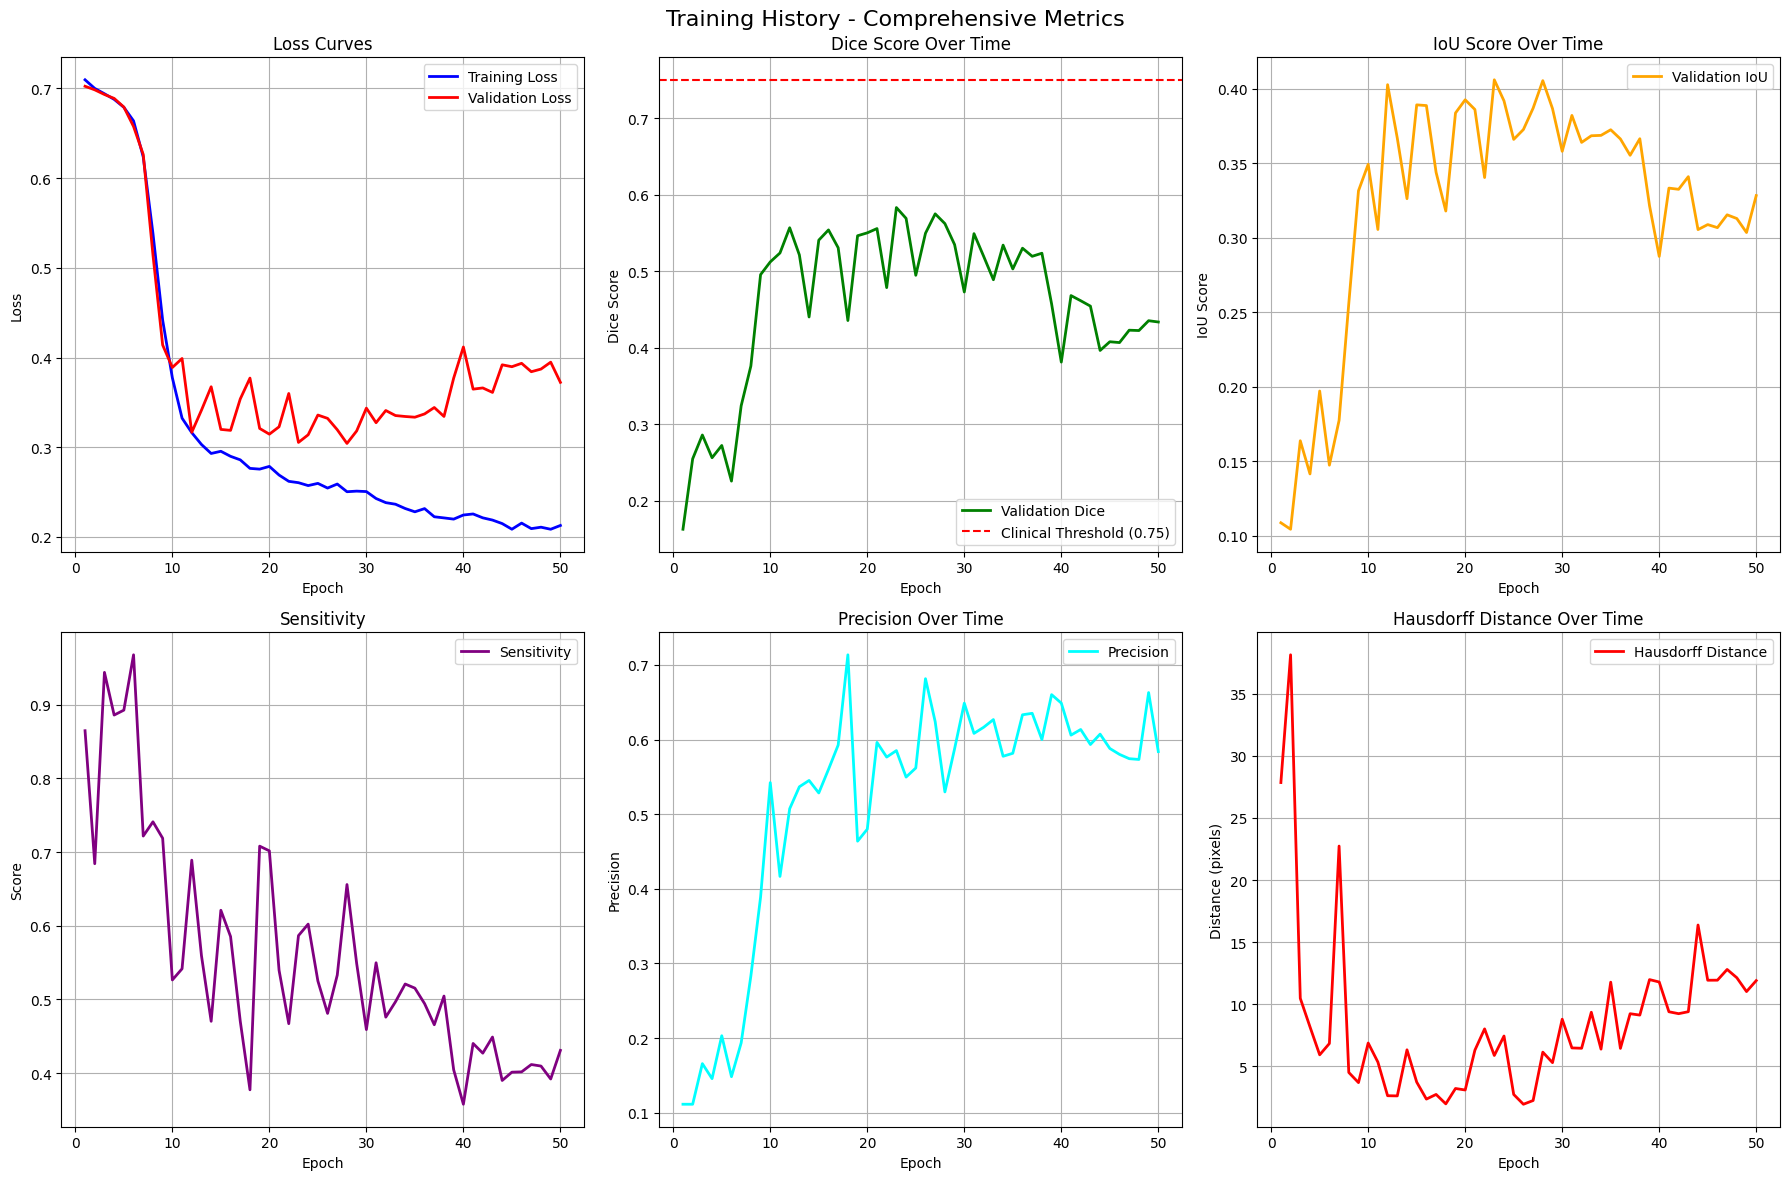


FINAL TRAINING STATISTICS
Final Training Loss: 0.2128
Final Validation Loss: 0.3724
Best Validation Dice: 0.5831 (Epoch 23)
Final Validation Dice: 0.4336
Final Validation IoU: 0.3283
Final Validation Sensitivity: 0.4308
Final Validation Specificity: 1.0000
Final Validation Precision: 0.5839


In [30]:
def plot_training_history(history):
    """Plot comprehensive training history"""
    epochs = range(1, len(history['train_loss']) + 1)

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Training History - Comprehensive Metrics', fontsize=16)

    # Plot 1: Loss curves
    axes[0, 0].plot(epochs, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
    axes[0, 0].plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Loss Curves')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Plot 2: Dice Score
    axes[0, 1].plot(epochs, history['val_dice'], 'g-', label='Validation Dice', linewidth=2)
    axes[0, 1].axhline(y=0.75, color='r', linestyle='--', label='Clinical Threshold (0.75)')
    axes[0, 1].set_title('Dice Score Over Time')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Dice Score')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Plot 3: IoU Score
    axes[0, 2].plot(epochs, history['val_iou'], 'orange', label='Validation IoU', linewidth=2)
    axes[0, 2].set_title('IoU Score Over Time')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('IoU Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True)

    # Plot 4: Sensitivity
    axes[1, 0].plot(epochs, history['val_sensitivity'], 'purple', label='Sensitivity', linewidth=2)
    axes[1, 0].set_title('Sensitivity')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Plot 5: Precision
    axes[1, 1].plot(epochs, history['val_precision'], 'cyan', label='Precision', linewidth=2)
    axes[1, 1].set_title('Precision Over Time')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Precision')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    # Plot 6: Hausdorff Distance
    valid_hausdorff = [h if h < 999.0 else np.nan for h in history['val_hausdorff']]
    axes[1, 2].plot(epochs, valid_hausdorff, 'red', label='Hausdorff Distance', linewidth=2)
    axes[1, 2].set_title('Hausdorff Distance Over Time')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].set_ylabel('Distance (pixels)')
    axes[1, 2].legend()
    axes[1, 2].grid(True)

    plt.tight_layout()
    plt.show()

    # Print final statistics
    print("\n" + "="*60)
    print("FINAL TRAINING STATISTICS")
    print("="*60)
    print(f"Final Training Loss: {history['train_loss'][-1]:.4f}")
    print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")
    print(f"Best Validation Dice: {max(history['val_dice']):.4f} (Epoch {history['val_dice'].index(max(history['val_dice']))+1})")
    print(f"Final Validation Dice: {history['val_dice'][-1]:.4f}")
    print(f"Final Validation IoU: {history['val_iou'][-1]:.4f}")
    print(f"Final Validation Sensitivity: {history['val_sensitivity'][-1]:.4f}")
    print(f"Final Validation Specificity: {history['val_specificity'][-1]:.4f}")
    print(f"Final Validation Precision: {history['val_precision'][-1]:.4f}")
    print("="*60)

# Plot training history
print("VISUALIZING TRAINING HISTORY...")
plot_training_history(history)

# Task 8: Evaluation on Test Set

After training and validation are complete, the final performance of the model is assessed on a held-out **test set**. This step simulates deployment and provides an unbiased estimate of how well the model will perform in real clinical scenarios.

#### What Happens During Test Evaluation?

1. **Best Model Checkpoint is Loaded**:
   - The model with the best validation performance (saved earlier) is reloaded using `load_state_dict`.
   - This ensures that test results reflect the most generalizable model, not just the last-trained one.

2. **Model is Set to Evaluation Mode**:
   - `model.eval()` disables dropout and batch normalization updates.
   - `torch.no_grad()` reduces memory usage and speeds up inference.

3. **Sliding Window Inference**:
   - Instead of feeding entire volumes (which may be too large for GPU memory), `SlidingWindowInferer` processes overlapping 3D patches.
   - Arguments:
     - `roi_size=(96, 96, 96)`: Size of each patch.
     - `sw_batch_size=4`: Number of patches processed in parallel.
     - `overlap=0.6`: Amount of overlap between patches to ensure smooth predictions.

4. **Prediction and Metric Calculation**:
   - The model’s outputs are passed through `softmax` and then `argmax` to get final predicted class labels.
   - Predictions are compared with ground-truth masks to compute metrics using the custom `SegmentationMetrics` class.
   - Metrics like Dice score and IoU are updated per sample.

5. **Tracking and Output**:
   - Test inputs, predictions, and ground truths are stored for later visualization or inspection.
   - Metrics are aggregated across all test samples and printed.

#### Why It Matters

- Test set results reflect true model generalization.
- Using patch-wise inference helps maintain spatial precision without memory overflow.
- Final metrics (like Dice and IoU) are what you would report in papers, clinical reports, or validation studies.

> Good test performance confirms that the model has not just memorized the training data but learned meaningful patterns applicable to new patients.


In [31]:
print("="*60)
print("EVALUATING ON TEST SET")
print("="*60)

# Load best model
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.eval()

# Initialize test metrics
test_metrics = SegmentationMetrics(include_background=False, num_classes=3)

# Sliding window inferer for better test performance
sliding_window_inference = SlidingWindowInferer(
    roi_size=(96, 96, 96),
    sw_batch_size=4,
    overlap=0.6
)

# Evaluate on test set
test_predictions = []
test_targets = []
test_images = []

with torch.no_grad():
    for i, test_data in enumerate(test_loader):
        test_inputs = test_data["image"].to(device)
        test_labels = test_data["label"].to(device)
        test_labels = torch.round(test_labels).clamp(0, 2)

        # Use sliding window inference for better results
        test_outputs = sliding_window_inference(test_inputs, model)
        test_pred_discrete = torch.argmax(torch.softmax(test_outputs, 1), dim=1, keepdim=True)

        # Store for visualization
        test_predictions.append(test_pred_discrete.cpu())
        test_targets.append(test_labels.cpu())
        test_images.append(test_inputs.cpu())

        # Update metrics
        test_metrics.update(test_pred_discrete.squeeze().cpu().numpy(),
                          test_labels.squeeze().cpu().numpy())

        print(f"Processed test sample {i + 1}/{len(test_loader)}")

# Compute final test metrics
test_results = test_metrics.compute()
test_metrics.print_summary("TEST SET ")

print(f"\nTest set evaluation completed on {len(test_loader)} samples")
print(f"Mean Test Dice Score: {test_results['dice']:.4f}")
print(f"Mean Test IoU: {test_results['iou']:.4f}")

EVALUATING ON TEST SET
Processed test sample 1/8
Processed test sample 2/8
Processed test sample 3/8
Processed test sample 4/8
Processed test sample 5/8
Processed test sample 6/8
Processed test sample 7/8
Processed test sample 8/8
TEST SET COMPREHENSIVE SEGMENTATION METRICS
TEST SET ==================================================
TEST SET Samples evaluated: 8
TEST SET Primary Metrics:
TEST SET   Dice Score:     0.6012
TEST SET   IoU Score:      0.4354
TEST SET Classification Metrics:
TEST SET   Sensitivity:    0.6199
TEST SET   Specificity:    1.0000
TEST SET   Precision:      0.6000
TEST SET Distance Metrics:
TEST SET   Hausdorff 95:   5.68 pixels

Test set evaluation completed on 8 samples
Mean Test Dice Score: 0.6012
Mean Test IoU: 0.4354


📊 Poll Question 9

## Task 8.1: Visualizing Segmentation Examples

Once model evaluation is complete, it is important to visually inspect **qualitative performance** — not just rely on aggregate metrics. This function helps you understand where the model succeeds and where it fails by displaying high- and low-quality predictions side by side.

#### How It Works

1. **Per-Case Dice Score Calculation**:
   - Each test case is compared to its ground truth using a binary Dice score.
   - Only foreground (hippocampus) regions are considered.
   - Dice is computed as:
     \[
     \text{Dice} = \frac{2 \cdot |\text{Prediction} \cap \text{Ground Truth}|}{|\text{Prediction}| + |\text{Ground Truth}|}
     \]

2. **Example Ranking**:
   - Cases are ranked based on their Dice scores.
   - The top and bottom `N` examples are selected for visualization (default = 2 each).

3. **Visualization Details**:
   - For each selected case, three 2D slices are shown from the 3D volume:
     - **Axial view** at the slice with most hippocampal content.
     - **Sagittal and coronal views** through the volume center.
     - **Comparison overlay**: Green for ground truth, red for prediction — helps spot missed or oversegmented regions.
   - Segmentation classes are visualized in color:
     - Red = Left hippocampus
     - Blue = Right hippocampus
   - All views are aligned and labeled for clinical interpretability.

4. **Detailed Per-Example Metrics**:
   - Dice score and IoU
   - Predicted vs. ground-truth volume (in voxels)
   - Volume ratio to assess over- or under-segmentation

#### Why This Is Important

- **Best examples** confirm that the model has learned the expected anatomy and spatial structure.
- **Worst examples** highlight failure modes (e.g., missing structures, spurious predictions).
- Enables **model debugging** and **clinical trust-building**, especially when integrating into decision-making pipelines.

> Visual inspection is a critical final step in segmentation tasks — it helps validate quantitative metrics and reveal edge cases that require further attention or data augmentation.


VISUALIZING GOOD AND BAD EXAMPLES WITH ENHANCED VISIBILITY...
Best examples (indices): [7, 5]
Worst examples (indices): [3, 4]

WORST PREDICTION EXAMPLES
Debug - Image shape: (96, 96, 96), Pred shape: (96, 96, 96), Target shape: (96, 96, 96)
Debug - Final slice shapes: img=(96, 96), target=(96, 96), pred=(96, 96)


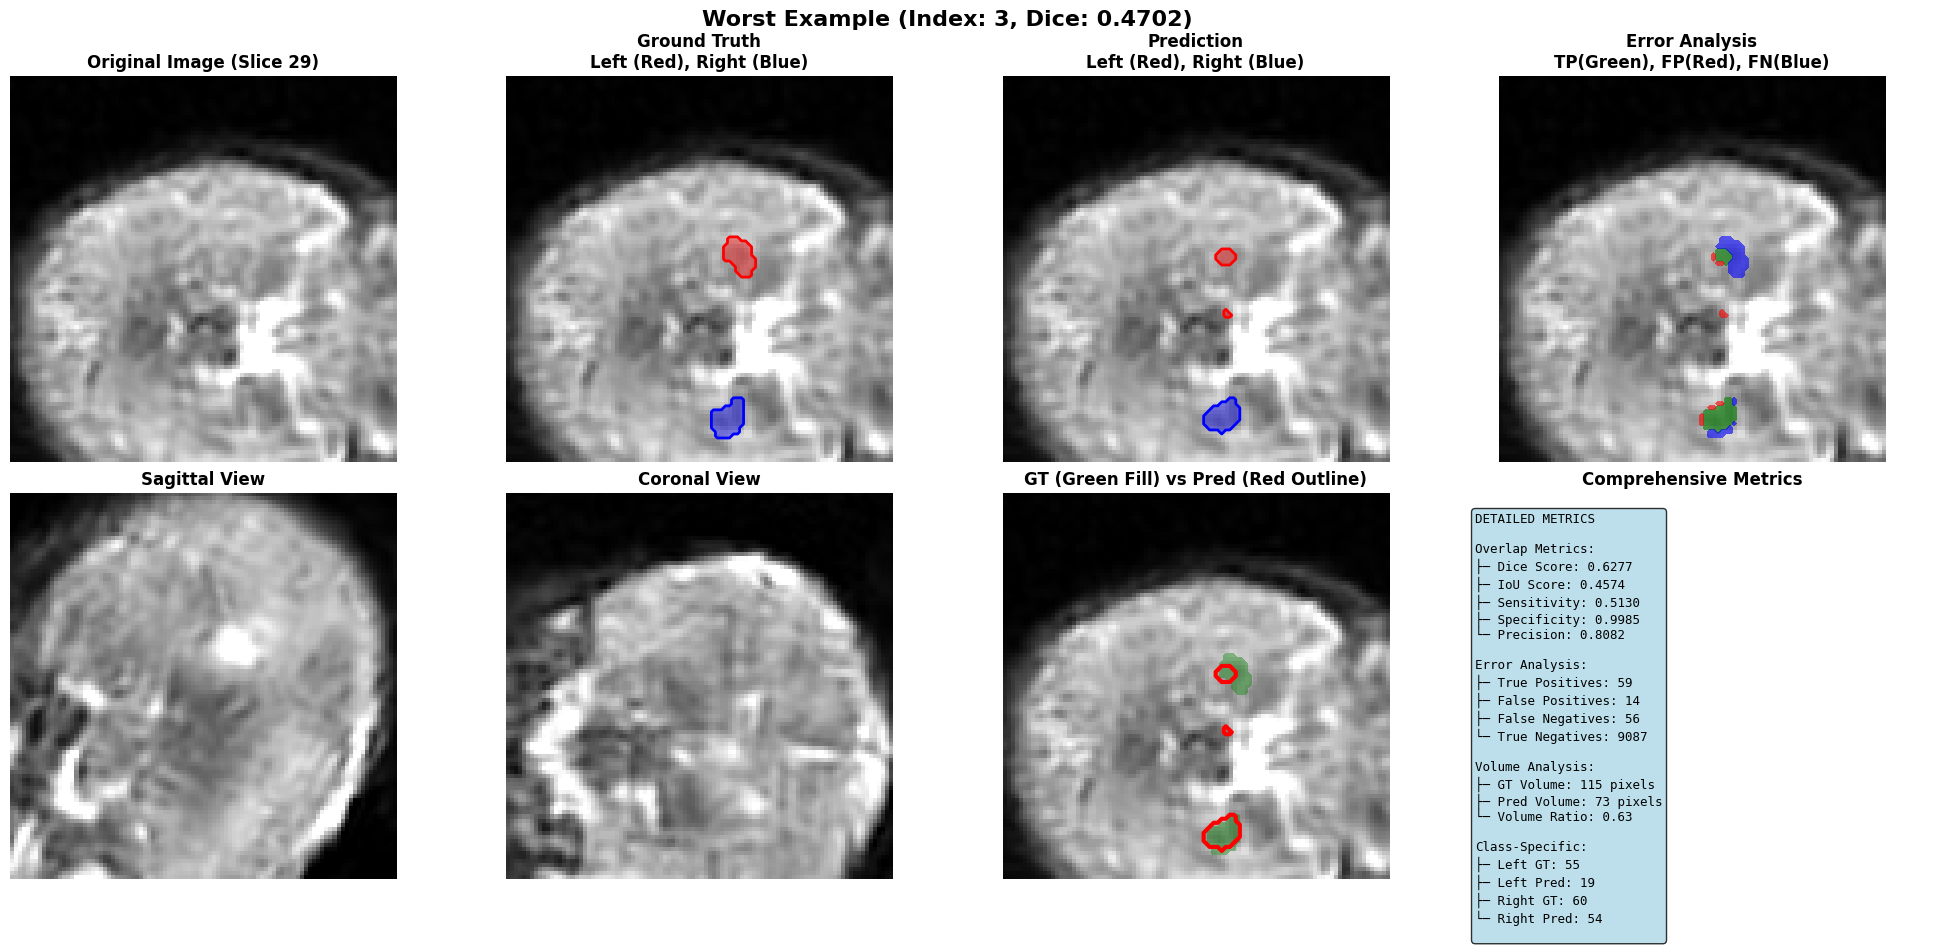

Sample Metrics Summary:
  Dice Score: 0.6277 | IoU: 0.4574
  Sensitivity: 0.5130 | Specificity: 0.9985
  TP: 59, FP: 14, FN: 56, TN: 9087
  Volume GT/Pred: 115/73 (ratio: 0.63)
------------------------------------------------------------
Debug - Image shape: (96, 96, 96), Pred shape: (96, 96, 96), Target shape: (96, 96, 96)
Debug - Final slice shapes: img=(96, 96), target=(96, 96), pred=(96, 96)


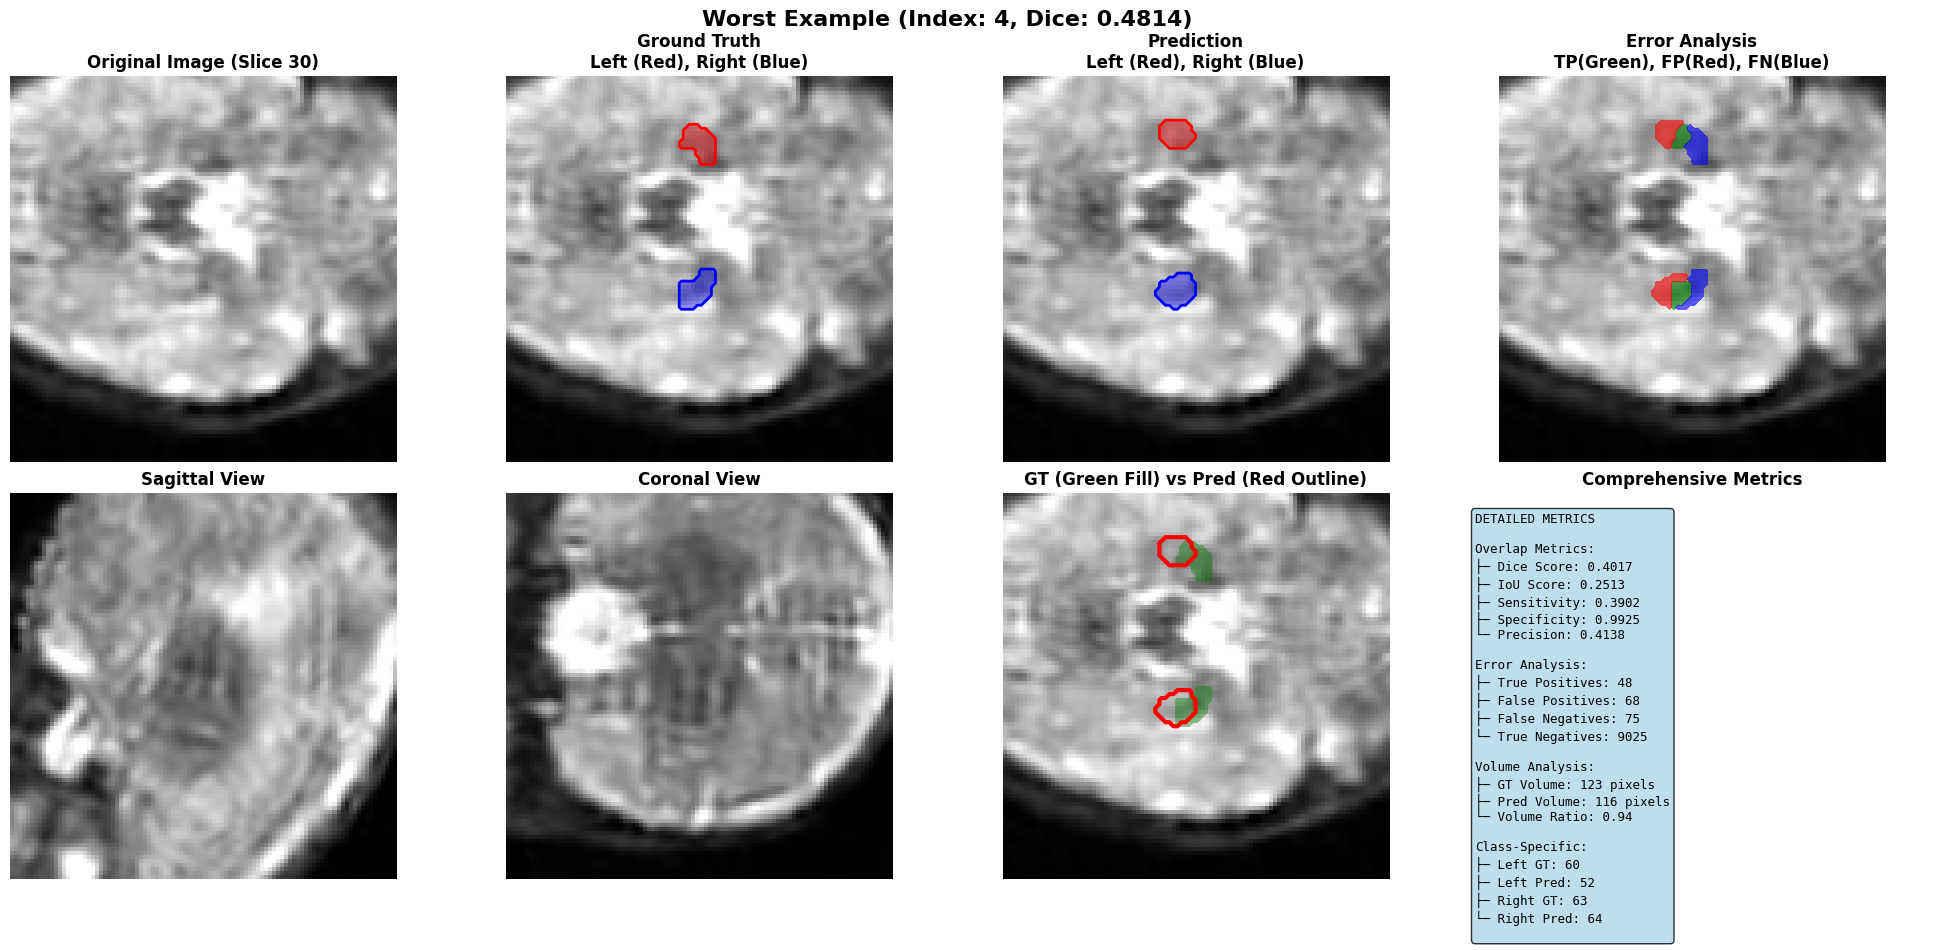

Sample Metrics Summary:
  Dice Score: 0.4017 | IoU: 0.2513
  Sensitivity: 0.3902 | Specificity: 0.9925
  TP: 48, FP: 68, FN: 75, TN: 9025
  Volume GT/Pred: 123/116 (ratio: 0.94)
------------------------------------------------------------

BEST PREDICTION EXAMPLES
Debug - Image shape: (96, 96, 96), Pred shape: (96, 96, 96), Target shape: (96, 96, 96)
Debug - Final slice shapes: img=(96, 96), target=(96, 96), pred=(96, 96)


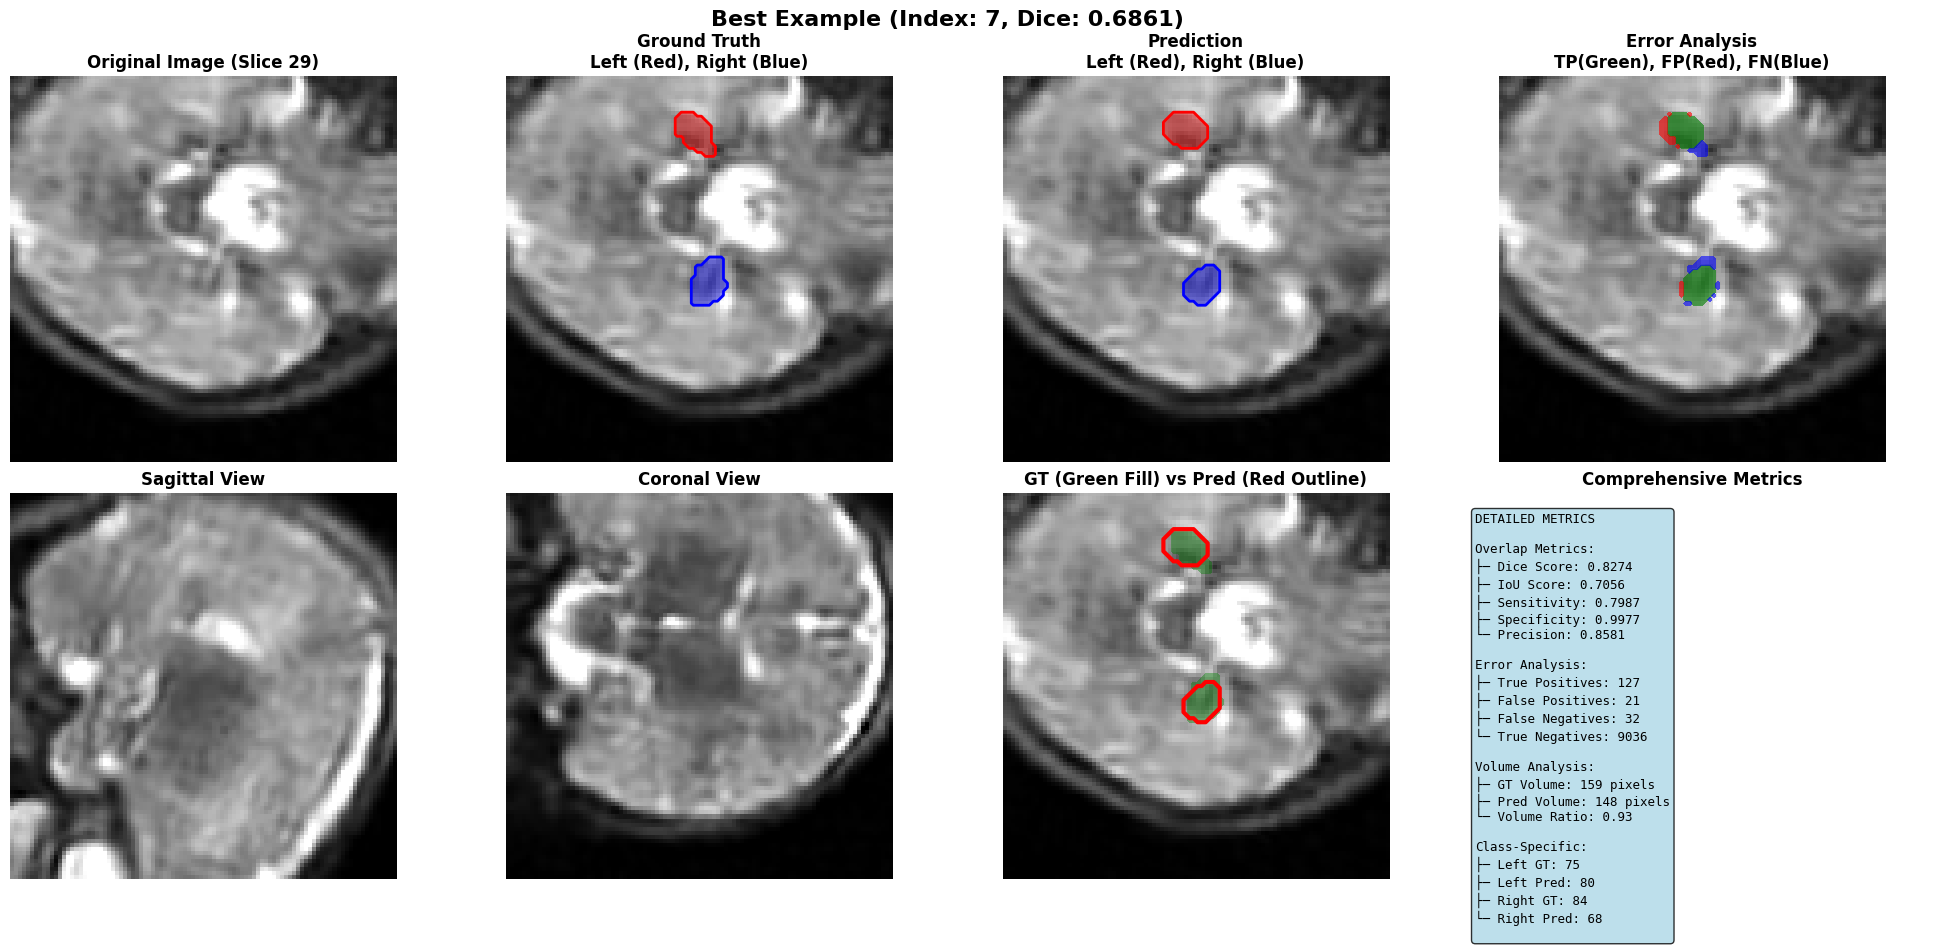

Sample Metrics Summary:
  Dice Score: 0.8274 | IoU: 0.7056
  Sensitivity: 0.7987 | Specificity: 0.9977
  TP: 127, FP: 21, FN: 32, TN: 9036
  Volume GT/Pred: 159/148 (ratio: 0.93)
------------------------------------------------------------
Debug - Image shape: (96, 96, 96), Pred shape: (96, 96, 96), Target shape: (96, 96, 96)
Debug - Final slice shapes: img=(96, 96), target=(96, 96), pred=(96, 96)


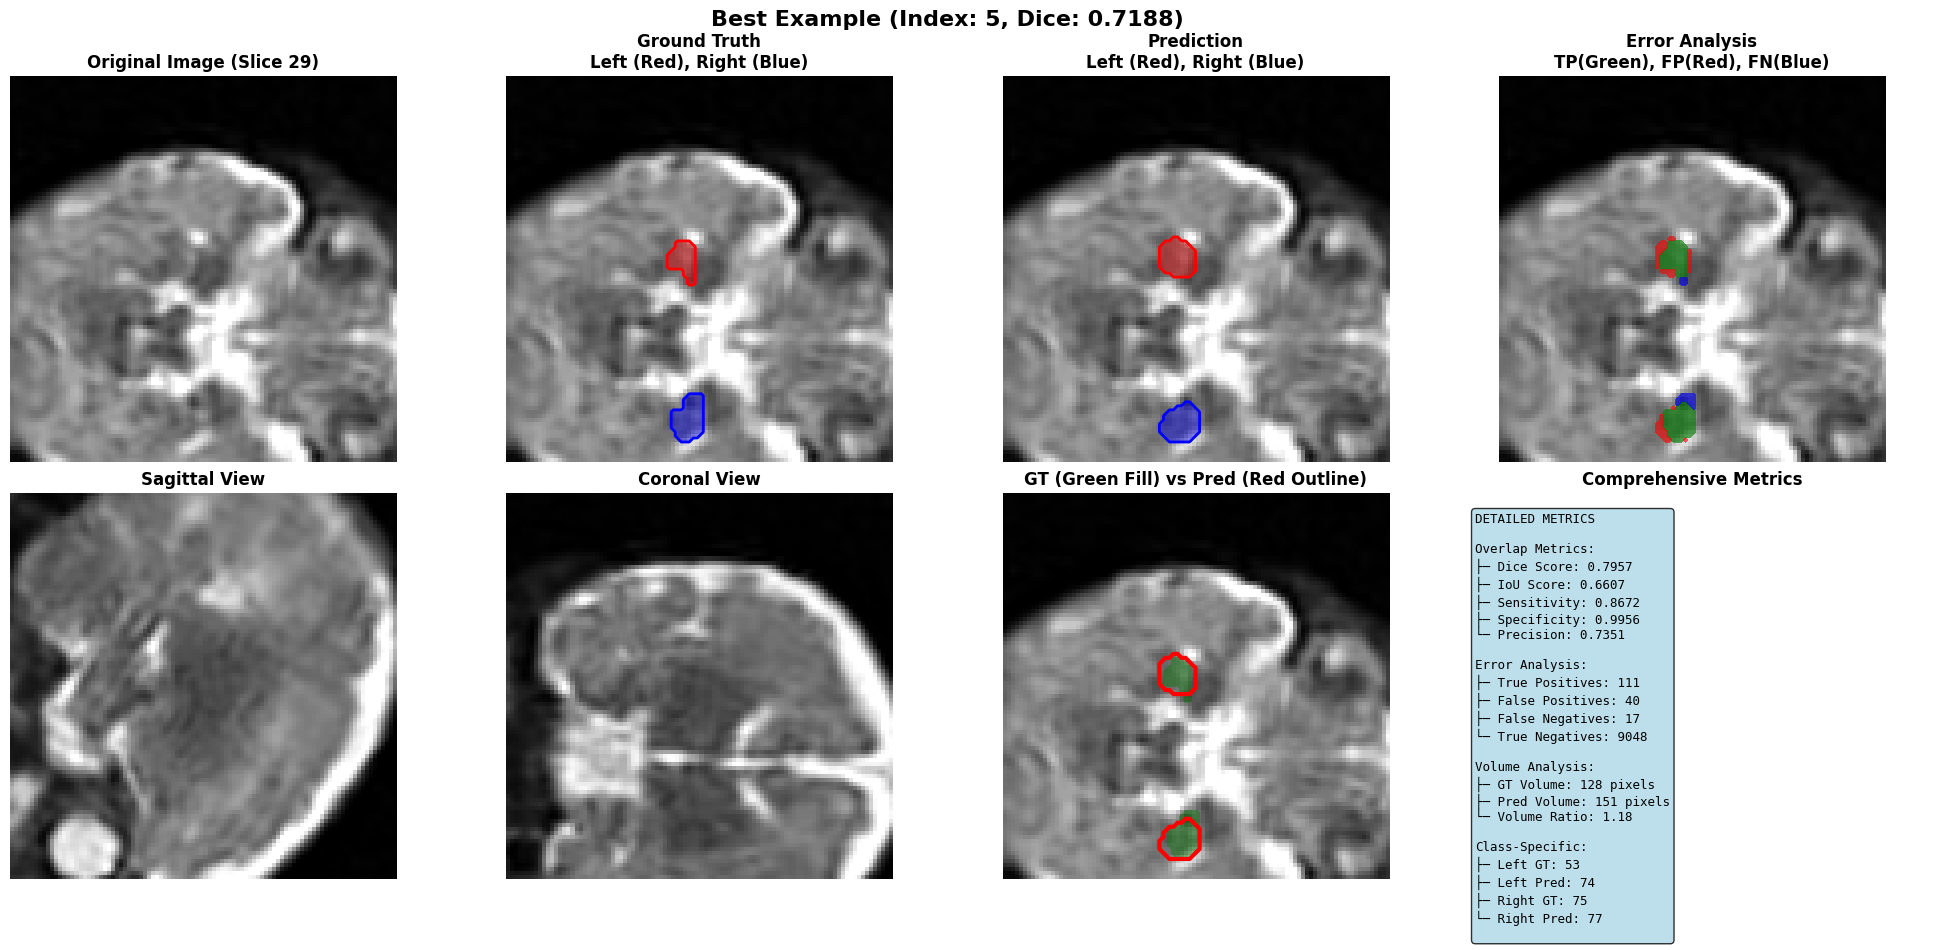

Sample Metrics Summary:
  Dice Score: 0.7957 | IoU: 0.6607
  Sensitivity: 0.8672 | Specificity: 0.9956
  TP: 111, FP: 40, FN: 17, TN: 9048
  Volume GT/Pred: 128/151 (ratio: 1.18)
------------------------------------------------------------


In [32]:
# VISUALIZATION OF GOOD AND BAD EXAMPLES WITH ENHANCED VISIBILITY
def visualize_prediction_examples(images, predictions, targets, num_examples=2):
    """Visualize good and bad prediction examples"""

    # Calculate individual dice scores for ranking
    individual_dice_scores = []
    for i in range(len(predictions)):
        pred = predictions[i]
        target = targets[i]

        pred_np = pred.squeeze().numpy()
        target_np = target.squeeze().numpy()

        pred_binary = (pred_np > 0).astype(np.uint8)
        target_binary = (target_np > 0).astype(np.uint8)

        intersection = np.sum(pred_binary * target_binary)
        dice = (2.0 * intersection) / (np.sum(pred_binary) + np.sum(target_binary) + 1e-8)
        individual_dice_scores.append((i, dice))

    # Sort by dice score
    individual_dice_scores.sort(key=lambda x: x[1])

    # Get best and worst examples
    worst_indices = [x[0] for x in individual_dice_scores[:num_examples]]
    best_indices = [x[0] for x in individual_dice_scores[-num_examples:]]

    print(f"Best examples (indices): {best_indices}")
    print(f"Worst examples (indices): {worst_indices}")

    # Visualize worst examples
    print("\n" + "="*60)
    print("WORST PREDICTION EXAMPLES")
    print("="*60)

    for idx in worst_indices:
        dice_score = [x[1] for x in individual_dice_scores if x[0] == idx][0]
        visualize_single_example(images[idx], predictions[idx], targets[idx],
                               f"Worst Example (Index: {idx}, Dice: {dice_score:.4f})")

    # Visualize best examples
    print("\n" + "="*60)
    print("BEST PREDICTION EXAMPLES")
    print("="*60)

    for idx in best_indices:
        dice_score = [x[1] for x in individual_dice_scores if x[0] == idx][0]
        visualize_single_example(images[idx], predictions[idx], targets[idx],
                               f"Best Example (Index: {idx}, Dice: {dice_score:.4f})")

def visualize_single_example(image, prediction, target, title):
    """Visualize a single prediction example with masks overlayed on images"""

    # Convert to numpy and ensure proper dimensions
    image_np = image.squeeze().numpy()
    pred_np = prediction.squeeze().numpy()
    target_np = target.squeeze().numpy()

    # Handle dimension squeezing for proper 3D volumes
    while len(image_np.shape) > 3:
        image_np = image_np.squeeze()
    while len(pred_np.shape) > 3:
        pred_np = pred_np.squeeze()
    while len(target_np.shape) > 3:
        target_np = target_np.squeeze()

    print(f"Debug - Image shape: {image_np.shape}, Pred shape: {pred_np.shape}, Target shape: {target_np.shape}")

    # If we have 3D data, find the slice with most hippocampus content
    if len(target_np.shape) == 3 and target_np.shape[2] > 1:
        target_slices = np.sum(target_np > 0, axis=(0, 1))
        if np.max(target_slices) > 0:
            best_slice = np.argmax(target_slices)
        else:
            best_slice = target_np.shape[2] // 2

        # Extract 2D slices
        img_slice = image_np[:, :, best_slice]
        target_slice = target_np[:, :, best_slice]
        pred_slice = pred_np[:, :, best_slice]

        # Additional views with bounds checking
        mid_sagittal = min(image_np.shape[0] // 2, image_np.shape[0] - 1)
        mid_coronal = min(image_np.shape[1] // 2, image_np.shape[1] - 1)
        sagittal_view = image_np[mid_sagittal, :, :]
        coronal_view = image_np[:, mid_coronal, :]
    else:
        # Already 2D data or single slice
        img_slice = np.squeeze(image_np)
        target_slice = np.squeeze(target_np)
        pred_slice = np.squeeze(pred_np)
        best_slice = 0
        sagittal_view = img_slice.copy()
        coronal_view = img_slice.copy()

    print(f"Debug - Final slice shapes: img={img_slice.shape}, target={target_slice.shape}, pred={pred_slice.shape}")

    # Create enhanced visualization
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Set up consistent image display parameters
    vmin, vmax = np.percentile(img_slice, [2, 98])

    # Row 1: Original, GT, Prediction, Error Analysis

    # 1. Original image
    axes[0, 0].imshow(img_slice, cmap='gray', vmin=vmin, vmax=vmax)
    axes[0, 0].set_title(f'Original Image (Slice {best_slice})', fontweight='bold')
    axes[0, 0].axis('off')

    # 2. Ground truth overlays
    axes[0, 1].imshow(img_slice, cmap='gray', vmin=vmin, vmax=vmax)
    if np.max(target_slice) > 0:
        # Left hippocampus - red
        left_mask = (target_slice == 1)
        if np.any(left_mask):
            axes[0, 1].contour(left_mask.astype(int), colors=['red'], linewidths=2, levels=[0.5])
            axes[0, 1].contourf(left_mask.astype(int), colors=['red'], alpha=0.4, levels=[0.5, 1])

        # Right hippocampus - blue
        right_mask = (target_slice == 2)
        if np.any(right_mask):
            axes[0, 1].contour(right_mask.astype(int), colors=['blue'], linewidths=2, levels=[0.5])
            axes[0, 1].contourf(right_mask.astype(int), colors=['blue'], alpha=0.4, levels=[0.5, 1])

    axes[0, 1].set_title('Ground Truth\nLeft (Red), Right (Blue)', fontweight='bold')
    axes[0, 1].axis('off')

    # 3. Prediction overlays
    axes[0, 2].imshow(img_slice, cmap='gray', vmin=vmin, vmax=vmax)
    if np.max(pred_slice) > 0:
        # Left prediction - red
        left_pred = (pred_slice == 1)
        if np.any(left_pred):
            axes[0, 2].contour(left_pred.astype(int), colors=['red'], linewidths=2, levels=[0.5])
            axes[0, 2].contourf(left_pred.astype(int), colors=['red'], alpha=0.4, levels=[0.5, 1])

        # Right prediction - blue
        right_pred = (pred_slice == 2)
        if np.any(right_pred):
            axes[0, 2].contour(right_pred.astype(int), colors=['blue'], linewidths=2, levels=[0.5])
            axes[0, 2].contourf(right_pred.astype(int), colors=['blue'], alpha=0.4, levels=[0.5, 1])

    axes[0, 2].set_title('Prediction\nLeft (Red), Right (Blue)', fontweight='bold')
    axes[0, 2].axis('off')

    # 4. Error Analysis
    axes[0, 3].imshow(img_slice, cmap='gray', vmin=vmin, vmax=vmax)

    # Calculate error maps
    gt_binary = (target_slice > 0).astype(bool)
    pred_binary = (pred_slice > 0).astype(bool)

    # True Positives, False Positives, False Negatives
    tp_mask = gt_binary & pred_binary
    fp_mask = (~gt_binary) & pred_binary
    fn_mask = gt_binary & (~pred_binary)

    # Draw error regions with different colors
    if np.any(tp_mask):
        axes[0, 3].contourf(tp_mask.astype(int), colors=['green'], alpha=0.6, levels=[0.5, 1])
    if np.any(fp_mask):
        axes[0, 3].contourf(fp_mask.astype(int), colors=['red'], alpha=0.6, levels=[0.5, 1])
    if np.any(fn_mask):
        axes[0, 3].contourf(fn_mask.astype(int), colors=['blue'], alpha=0.6, levels=[0.5, 1])

    axes[0, 3].set_title('Error Analysis\nTP(Green), FP(Red), FN(Blue)', fontweight='bold')
    axes[0, 3].axis('off')

    # Row 2: Different views and detailed analysis

    # 5. Sagittal view
    sag_vmin, sag_vmax = np.percentile(sagittal_view, [2, 98])
    axes[1, 0].imshow(sagittal_view, cmap='gray', vmin=sag_vmin, vmax=sag_vmax)
    axes[1, 0].set_title('Sagittal View', fontweight='bold')
    axes[1, 0].axis('off')

    # 6. Coronal view
    cor_vmin, cor_vmax = np.percentile(coronal_view, [2, 98])
    axes[1, 1].imshow(coronal_view, cmap='gray', vmin=cor_vmin, vmax=cor_vmax)
    axes[1, 1].set_title('Coronal View', fontweight='bold')
    axes[1, 1].axis('off')

    # 7. GT vs Prediction comparison
    axes[1, 2].imshow(img_slice, cmap='gray', vmin=vmin, vmax=vmax)

    # Show GT as filled regions and predictions as outlines
    if np.any(gt_binary):
        axes[1, 2].contourf(gt_binary.astype(int), colors=['green'], alpha=0.4, levels=[0.5, 1])

    if np.any(pred_binary):
        axes[1, 2].contour(pred_binary.astype(int), colors=['red'], linewidths=3, levels=[0.5])

    axes[1, 2].set_title('GT (Green Fill) vs Pred (Red Outline)', fontweight='bold')
    axes[1, 2].axis('off')

    # 8. Detailed metrics
    intersection = np.sum(tp_mask)
    union = np.sum(gt_binary | pred_binary)
    dice = (2.0 * intersection) / (np.sum(pred_binary) + np.sum(gt_binary) + 1e-8)
    iou = intersection / (union + 1e-8) if union > 0 else 0

    tp_count = np.sum(tp_mask)
    fp_count = np.sum(fp_mask)
    fn_count = np.sum(fn_mask)
    tn_count = np.sum((~gt_binary) & (~pred_binary))

    sensitivity = tp_count / (tp_count + fn_count) if (tp_count + fn_count) > 0 else 0
    specificity = tn_count / (tn_count + fp_count) if (tn_count + fp_count) > 0 else 0
    precision = tp_count / (tp_count + fp_count) if (tp_count + fp_count) > 0 else 0

    pred_volume = np.sum(pred_binary)
    target_volume = np.sum(gt_binary)

    # Create metrics text box
    metrics_text = f"""DETAILED METRICS

Overlap Metrics:
├─ Dice Score: {dice:.4f}
├─ IoU Score: {iou:.4f}
├─ Sensitivity: {sensitivity:.4f}
├─ Specificity: {specificity:.4f}
└─ Precision: {precision:.4f}

Error Analysis:
├─ True Positives: {tp_count}
├─ False Positives: {fp_count}
├─ False Negatives: {fn_count}
└─ True Negatives: {tn_count}

Volume Analysis:
├─ GT Volume: {target_volume} pixels
├─ Pred Volume: {pred_volume} pixels
└─ Volume Ratio: {pred_volume/(target_volume+1e-8):.2f}

Class-Specific:
├─ Left GT: {int(np.sum(target_slice == 1))}
├─ Left Pred: {int(np.sum(pred_slice == 1))}
├─ Right GT: {int(np.sum(target_slice == 2))}
└─ Right Pred: {int(np.sum(pred_slice == 2))}
    """

    axes[1, 3].text(0.05, 0.95, metrics_text, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
                   fontfamily='monospace', transform=axes[1, 3].transAxes)
    axes[1, 3].set_xlim(0, 1)
    axes[1, 3].set_ylim(0, 1)
    axes[1, 3].axis('off')
    axes[1, 3].set_title('Comprehensive Metrics', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print summary to console
    print(f"Sample Metrics Summary:")
    print(f"  Dice Score: {dice:.4f} | IoU: {iou:.4f}")
    print(f"  Sensitivity: {sensitivity:.4f} | Specificity: {specificity:.4f}")
    print(f"  TP: {tp_count}, FP: {fp_count}, FN: {fn_count}, TN: {tn_count}")
    print(f"  Volume GT/Pred: {target_volume}/{pred_volume} (ratio: {pred_volume/(target_volume+1e-8):.2f})")
    print("-" * 60)

# Visualize examples with enhanced visibility
print("VISUALIZING GOOD AND BAD EXAMPLES WITH ENHANCED VISIBILITY...")
visualize_prediction_examples(test_images, test_predictions, test_targets, num_examples=2)


### **Real-World Clinical Impact Potential**

**Immediate Clinical Applications:**
This hippocampus segmentation capability enables:
- **Early Alzheimer's detection**: Automated volumetric measurements for population screening programs
- **Epilepsy surgical planning**: Precise anatomical localization for treatment decision support
- **Research acceleration**: Large-scale neuroimaging studies in previously inaccessible populations
- **Healthcare equity advancement**: Advanced neuroimaging analysis capabilities in regions with limited specialist availability

📊 Poll Question 10

## Task 9: Extension Exercise: Multi-Class Segmentation Challenge

### Challenge for Advanced Students

Now that you've successfully implemented bilateral hippocampus segmentation, it's time for the next challenge!

### Your Task:
Extend this implementation to segment **all brain structures** in LISA Task 2:

#### Target Structures:
1. **Bilateral Hippocampi** (Classes 1-2) *Already completed!*
2. **Bilateral Basal Ganglia** (Classes 5-8)  *Your challenge!*
   - Left Caudate Nucleus (Class 5)
   - Right Caudate Nucleus (Class 6)
   - Left Lentiform Nucleus (Class 7)
   - Right Lentiform Nucleus (Class 8)

### Implementation Steps:

#### 1. **Data Integration** (Difficulty: ⭐⭐)
```python
# Hint: Modify the dataset to load both hippocampus AND basal ganglia masks
BASE_DIR = Path('./LISA_Task_2/')
HIPP_MASK_DIR = BASE_DIR / 'Subtask 2a - Hippocampus Segmentations'
BAGA_MASK_DIR = BASE_DIR / 'Subtask 2b - Basal Ganglia Segmentations'  # Add this!

# TODO: Combine masks into single multi-class segmentation
# Classes: 0=Background, 1=Left_Hipp, 2=Right_Hipp, 3=Left_Caudate,
#          4=Right_Caudate, 5=Left_Lentiform, 6=Right_Lentiform
```

#### 2. **Model Architecture** (Difficulty: ⭐⭐⭐)
```python
# Hint: Increase number of output classes
model = BasicUNet(out_channels=7)  # Was 3, now 7!

# TODO: Consider if you need deeper/wider architecture for more classes
# TODO: Experiment with different base_channels (64 → 96 or 128)
```

#### 3. **Loss Function Adaptation** (Difficulty: ⭐⭐⭐)
```python
# Hint: Handle severe class imbalance with weighted losses
# Basal ganglia structures are even smaller than hippocampus!

# TODO: Calculate class weights for all 7 classes
# TODO: Consider structure-specific loss weighting
# TODO: Experiment with different Dice/Focal loss ratios
```

#### 4. **Evaluation Metrics** (Difficulty: ⭐⭐)
```python
# TODO: Extend metrics calculation for all structures
structure_names = {
    1: 'Left Hippocampus', 2: 'Right Hippocampus',
    3: 'Left Caudate', 4: 'Right Caudate',
    5: 'Left Lentiform', 6: 'Right Lentiform'
}
```


### Advanced Techniques to Try:

#### A) **Multi-Scale Training** (Difficulty: ⭐⭐⭐⭐)
- Train on multiple input resolutions (128x128, 256x256, 512x512)
- Use different loss weights for different scales

#### B) **Attention Mechanisms** (Difficulty: ⭐⭐⭐⭐)
- Add spatial attention gates to focus on small structures
- Implement channel attention for feature refinement

#### C) **Post-Processing** (Difficulty: ⭐⭐⭐)
- Connected component analysis to remove isolated pixels
- Morphological operations for shape refinement
- Conditional Random Fields (CRF) for boundary improvement

## Conclusions and Clinical Translation

### **Key Technical and Clinical Achievements**

**Comprehensive Pipeline Development:**
Through this focused implementation, we have successfully developed a complete medical AI pipeline that:
- **Handles real-world clinical data**: Processes ultra low-field MRI from resource-limited healthcare settings
- **Addresses fundamental challenges**: Implements advanced loss functions for extreme class imbalance
- **Provides interpretable results**: Includes visual validation and comprehensive error analysis
- **Enables practical deployment**: Complete model checkpointing and inference pipeline ready for clinical integration

### **Educational Learning Outcomes Achieved**

#### **Technical Skills Developed:**
1. **Medical data preprocessing mastery**: NIfTI file handling, intelligent slice selection, and medical-specific normalization
2. **Architecture design expertise**: U-Net optimization specifically for medical segmentation tasks
3. **Advanced loss function implementation**: Dice, Focal, and combined losses for severely imbalanced medical data
4. **Robust training methodology**: Early stopping, model checkpointing, and adaptive learning rate scheduling
5. **Clinical validation techniques**: Medical-specific metrics and visual interpretation methodologies

### **Real-World Clinical Impact Potential**

**Immediate Clinical Applications:**
This hippocampus segmentation capability enables:
- **Early Alzheimer's detection**: Automated volumetric measurements for population screening programs
- **Epilepsy surgical planning**: Precise anatomical localization for treatment decision support
- **Research acceleration**: Large-scale neuroimaging studies in previously inaccessible populations
- **Healthcare equity advancement**: Advanced neuroimaging analysis capabilities in regions with limited specialist availability

### **Future Steps**

**Advanced Challenges:**
Now that you have mastered focused hippocampus segmentation, you are prepared to tackle:
- **Multi-structure brain segmentation**: Extending to the full complexity of brain anatomy
- **Multi-modal imaging integration**: Combining different imaging modalities for enhanced diagnostic capability
- **Longitudinal analysis**: Tracking changes over time for disease progression monitoring
- **Cross-population validation**: Ensuring model generalization across diverse patient populations
